In [1]:
import sys
sys.path.append('..')
import nbimport
nbimport.initialize()

In [2]:
from Stat_08 import *
css_styling()

# Kurvetilpasning

# Curve fitting

## Formål

- At kunne bruge _kurvetilpasning_ i en statistisk analyse. 
- At kunne formulerer _modeller_ brugt i kurvetilpasning.
- At kunne bestemme antallet af frihedsgrader $\nu$.
- At kunne beregne $\chi^2$ statestikken for en kurvetilpasning.
- At kunne skelne mellem _lineære_ og _ikke-lineære_ modeller.
- At kunne bruge _kurvetilpasning_ til teste en hypotese om en given sandsynlighedsfordeling ud fra en prøve.
- At have en intuition om hvorledes kurvetilpasning forløber.
- At kunne bruge en _eksakt_ løsning for lineære modeller. 

## Purpose

- To be able to use _curve fitting_ in a statistical analysis.
- To be able to formulate _models_ used in curve fitting.
- To be able to determine the number of degrees of freedom $\nu$.
- To be able to calculate the $\chi^2$ statistic for a curve fit.
- To be able to distinguish between _linear_ and _non-linear_ models.
- To be able to use _curve fitting_ to test a hypothesis of a given probability distribution based on a sample.
- Have an intuition about how curve fitting is done.
- To be able to use an _exact_ solution for linear models.

## Generelt om kurvetilpasning 

Ved _kurvetilpasning_ (engl. [_curve fitting_](https://en.wikipedia.org/wiki/Curve_fitting)) forstår vi en procedure hvor vi forsøger at tilpasse en kurve (eller funktion) til en prøve.  Vi kan have to formål med kurvetilpasning

1. At finde en funktion som bedst beskriver vores prøve.  Vi vil altså _parameteriserer_ vores prøve med en funktion.
2. Vi vil teste om en _hypotese_ er konsitent med vores prøve. 

I det første tilfælde er vi ikke interesseret i parameterisering $P$s form udfra en bestemt hypotese, og vi kan som sådan ikke fortolke vores parameterisering som et udsagn om de bagvedliggende årsager til vores prøve. 

I det andet tilfælde har vi en hypotese $H$ om som vi udfordre med vores prøve.  Passer hypotesen _ikke_ med prøven kan vi udlukke hypotesen med en hvis sandsynlighed.  I denne forstand kan kurvetilpasning ses som en udtryk for den _videnskabelige metode_: Givet en hypotese $H$ om $E$, design et eksperiment der undersøger $E$ med estimatet $\hat{E}$, og afgør om $H$ er konsistent med $\hat{E}$.

I begge tilfælde kalder vi ofte $f$ for vores _model_ af data (prøven). 

Der findes mange forskellige metoder til at lave kurvetilpasning. De to almindeligste er _mindste kvadrat_ (engl. [_least squares_](https://en.wikipedia.org/wiki/Least_squares)) og _maximal sandsynlighed_ (engl. [_maximum likelyhood_](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)). Her vil vi udelukkende beskæftige os med _mindste kvadrat_ metoden. 

## Curve fitting in general 

By [_curve fitting_](https://en.wikipedia.org/wiki/Curve_fitting) we understand a procedure where we try to fit a curve (or function) to a sample. We can have two purposes for curve fitting

1. Finding a function that best describes our sample. We will _parameterize _our sample with a function.
2. We will test if a _hypothesis _is consistent with our sample.

In the first case, we are not interested in that the parameterization $P$'s form from a particular hypothesis, and we cannot as such interpret our parameterization as a statement about the underlying causes of our sample.

In the second case, we have a hypothesis $H$ which we challenge with our sample. If the hypothesis does _not_ fit h the sample, we can exclude the hypothesis with some probability. In this sense, curve fitting can be seen as an expression of the_ scientific method _: Given a hypothesis $H$ of $E$, design an experiment that examines $E$ with the estimate $\hat{E}$, and determines whether $H$ is consistent with $\hat{E}$.

In both cases, we often call $f$ for our _model_ of the data (sample).

There are many different methods for making curve fitting. The two most common are [_least squares_](https://en.wikipedia.org/wiki/Least_squares) and [_maximum likelyhood_](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation). Here we will only deal with the _least square_ method.

## $\chi^2$ - kvaliteten af en kurvetilpasning

Antag at vi har prøven 

## $\chi^2$ - quality of fit 

Suppose we have the sample

$$\{(x_1,y_1,\delta_1),\ldots,(x_N,y_N,\delta_N)\}\quad,$$ 

hvor hver $(x_i,y_i,\delta_i)$ repræsenterer observationen $y_i\in Y$, og dennes usikkerhed $\delta_i$,  ved værdien $x_i\in X$.  Antag ydermere at vores kurve vi søger at tilpasse er $f:X\rightarrow Y$ - det vil sige en afbildning fra mængden $X$ in mængden $Y$.  Kurven $f$ afhænger typisk en eller flere parametre $\theta$, og vi vil ofte skrive $f(x;\theta)$ for at understrege denne afhængighed. 

Hvis vi søger at teste en hypostese $H$, så er $f$ sandsynlighedsfordelingen af $X$ givet denne hypostese, og $Y$ er de mulige sandsynligheder.  

where each $(x_i,y_i,\delta_i)$ represents the observation $y_i\in Y$, its uncertainty $\delta_i$, at the value $x_i\in X$. Suppose furthermore that the curve we seek to fit is $f:X\rightarrow Y$ - that is, a mapping from the set $X$ into the set $Y$. The $f$ curve typically depends on one or more parameters $\theta$, and we will often write $f(x;\theta)$ to underline this dependence.

If we seek to test a hypothesis $H$, then the $f$ is the probability distribution of $X$ given this hypostesis and $Y$ are the possible probabilities.

Vi kan beregne _residualen_ (engl. [_residual_](https://en.wikipedia.org/wiki/Errors_and_residuals)) i hver punkt som 

We can calculate the [_residual_](https://en.wikipedia.org/wiki/Errors_and_residuals) at each point with

$$ r_i = \frac{y_i - f(x_i;\theta)}{\delta_i}\quad,$$ 

eller _afstanden fra den observeret værdi $y_i$ til den forventet værdi $f(x)$_ passende normeret til usikkerheden $\delta_i$ i punktet $x_i$.  Mindste kvadrat metoden går ud på at besteme (estimerer) de værdier af parametrene $\theta=\hat\theta$ sådan at summen af de kvadratisk residualer 

or _the distance from the observed value $y_i$ to the expected value $f(x)$_ appropriately scaled by the uncertainty $\delta_i$, at the $x_i$ point. The least squares method seeks to determine (estimate) the values of the parameters $\theta=\hat\theta$ such that the sum of the square residuals

$$\chi^2 = \sum_{i=1}^N r_i^2 = \sum_{i=1}^{N} \frac{\left(y_i - f(x_i;\hat\theta)\right)^2}{\delta_i^2}\quad,$$

er mindst mulig. Det vil sige vi søger at finde parametrene $\hat\theta$ sådan at den normeret kvadratiske afstand fra prøven ($y_i$) til funktionen ($f(x_i)$) er _mindst mulig_ - her af navnet _mindste kvadrat_.  

Bemærk at i kurvetilpasning er vores frie parametre $\hat\theta$ - ikke $(x_i,y_i,\delta_i)$.   Det vil sige at vi opfatter $f$ - og dermed $\chi^2$ - som en funktion af _parametrene_ $\hat\theta$.  Prøven $(x_i,y_i,\delta_i)$ opfattes som fast og varierers _ikke_ i kurvetilpasning. 

is the least possible. That is, we seek to find the parameters $\hat\theta$ such that the normalized square distance from the sample ($y_i$) to the function ($f(x_i)$) is _at its smallest_ - hence the name _smallest square_.

Note that in curve fitting our free parameters are $\hat\theta$ - not $(x_i,y_i,\delta_i)$. That means that we think of $f$ - and hence $\chi^2$ - as a function of the _parameters_ $\hat\theta$. The sample $(x_i,y_i,\delta_i)$ are thought of as given and constant and is _not_ varied in curve fitting.

Variablen $\chi^2$ kaldes _ki-kvadratet_ (med stemt "k") og er altså et mål for hvor godt vores funktion $f$ beskriver prøven.   Hvis vi har $N$ elementer i vores prøve og funktionen $f$ har $N_f$ parametre, så definerer vi _antallet af frihedsgrader_ (engl. [_degrees of freedom_](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics))) hved 

The variable $\chi^2$ is called the _chi-square_ and is thus a measure of how well our function $f$ describes the sample. If we have $N$ elements in our sample and the function $f$ has $N_f$ parameters, then we define 
[_the number of degrees of freedom_](https://en.wikipedia.org/wiki/Degrees_or_freedom_(statistics))

$$ \nu = N-N_f\quad.$$ 

Man kan vise at hvis residualerne $r_i$ er normalfordelt, eller at $y_i$ er statistisk spredt rundt om $f(x_i)$, så forventer vi at $\chi^2=\nu$ (se [senere](#Eksempel:-$\chi^2$-fordelingen)).  Det fører til kravet for en passende kurvetilpasning at 

One can show that if the residual $r_i$ are normal distributed, or that $y_i$ are statistically scattered around $f(x_i)$, then we expect $\chi^2=\nu$ (see [later](#Example:-$\chi^2$-distribution)). This leads to the requirement for a suitable curve fitting of

$$\frac{\chi^2}{\nu}\approx 1\quad.$$ 

Variablen $\chi^2/\nu$ kaldes det _reduceret $\chi^2$_ (engl. [_reduced $\chi^2$_](https://en.wikipedia.org/wiki/Reduced_chi-squared_statistic)). 

Dette krav svarer til at hvis vi gentager prøven, og disse prøver er taget fra fordelingsfunktionen $f$, så er det lige sandsynligt at få et mindre eller større $\chi^2$. 

The variable $\chi^2/\nu$ is called the [_reduced $\chi^2$_](https://en.wikipedia.org/wiki/Reduced_chi-squared_statistic).

This requirement corresponds to, if we repeat the measurement and these samples are taken from the $f$ distribution function, then it is equally likely to get a smaller or larger $\chi^2$.

En god _parameterisering_ $f$ af prøven skal altså give $\chi^2\approx\nu$, og vi bekymre os mindre om $f$'s form.  Tvinger vi vores $f$ til at give $\chi^2/\approx\nu$ kan vi dog ikke fortolke $f$ som en bagvedliggende sandsynlighedsfordeling, og parametre $p$ har ingen reel mening. 

A good _parameterisation_ $f$ of the sample must therefore give $\chi^2\approx\nu$, and we worry less about the functional form of $f$. If we force our $f$ to give $\chi^2/\approx\nu$, however, we cannot interpret $f$ as a underlying probability distribution, and parameters $p$ have no phyiscal meaning.

Tester vi derimod om hypotesen $H$ - udtryk via $f$ - er konsistent med prøven vil vi forkaste hypotesen dersom $\chi^2/\nu\not\approx 1$.  Præcis hvor langt fra enhed $\chi^2/\nu$ skal være for at vi forkaster hypotesen afhænger af vores $\nu$ og modellen, samt den statistiske significans vi er ude efter. 

If, on the other hand, we test whether the hypothesis $H$ - expressed via $f$ - is consistent with the sample, we will reject the hypothesis if $\chi^2/\nu\not\approx 1$. Exactly how far from unit $\chi^2/\nu$ should be in order to reject the hypothesis depends on our $\nu$ and the model, as well as the statistical significance we are looking for.

### Eksempel: Beregning af $\chi^2$

Hverken _NumPy_ eller _SciPy_ har en funktion til at beregne $\chi^2$ givet en prøve, en model, og parametre, så vi vil definerer en her.  Vores funktion vil tage som parametre 

- $x$ vores uafhængige variabel 
- $y$ vores afhængige variabel
- $\delta$ usikkerheden på $y$.  Hvis ingen er givet antager vi at alle usikkerheder er 1 
- $f$ vores model.  Denne skal være en funktion af formen 

      def f(x,*theta):
   
  som altså tager vores uafhængige variabel som første argument og udregner den afhængige værdi givet parametrene $p$. 
- $p$ vores models parametre
- Eventuelt $\delta_x$ usikkerheden på den uafhængige variabel $x$.  Hvis denne er givet vil vi bruge den effektive varians (se [her](#Effektiv-varians)). 
- Eventuelt en funktion til at beregne $\mathrm{d}/\mathrm{d}x$ som bruges til den effektive varians. 
- Eventuelt en skridt længde til beregning af $\mathrm{d}/\mathrm{d}x$ numerisk.
  

Funktionen returnerer vores $\chi^2$ and $\nu$

### Example: Calculating $\chi^2$

Neither _NumPy_ nor _SciPy_ has a function to calculate $\chi^2$ given a sample, a model, and parameters, so we will define one here. Our function will take as parameters

- $x$ our independent variable
- $y$ our dependent variable
- $\delta$ uncertainty of $y$. If none is given, we assume that all uncertainties are 1
- $f$ our model. This must be a function defined like

      def f (x, *theta):
    
  which thus takes our independent variable as the first argument and calculates the dependent value given the parameters $p$.
  
- $p$ our model's parameters
- Optionally $\delta_x$ - the uncertainty on the independent variable $x$.  If this is given, then we will use the  effektive variance (see [here](#Effective-variance)).
- Optionally, a function to calculate $\mathrm{d}/\mathrm{d}x$ as used in the effektive variance. 
- Optionally, a step length if $\mathrm{d}/\mathrm{d}x$  is calculated numerically 
  
The function returns our $\chi^2$ and $\nu$

In [3]:
def chi2nu(x,y,f,theta,delta=None,deltax=None,df=None,df_step=None):
    from numpy import ones_like, sum, array, gradient, asarray,ndim
    if delta is None:
        delta = ones_like(y)
        
    if len(x) != len(y):
        raise ValueError("Inconsistent sizes of X and Y")
    
    if len(delta) != len(y):
        raise ValueError("Inconsistent sizes of Y and Delta")
    
    d2 = asarray(delta)**2
    if deltax is not None:
        d2 = effective_variance(x,deltax,f,theta,delta,df,df_step)
        
    xnz = asarray(x)[d2>0]
    ynz = asarray(y)[d2>0]
    dnz = d2[d2>0]
    
    try:
        ret = sum((ynz-f(xnz,*theta))**2/dnz,axis=0)
    except:
        ret = sum([(yy - f(xx,*theta))**2/dd for xx,yy,dd in zip(xnz,ynz,dnz)],axis=0)
        
    return ret, len(ynz)-len(theta)

Lad os lave en prøve med $x\in[0,1]$ og $y=a+bx+cx^2$ hvor vi ligger noget støj til, som også vil være vores usikkerheder.  Vores model sætter vi til 

Let's make a sample with $x\in[0,1]$ and $y=a+bx+cx^2$ where we add some noise, which will also be our uncertainties. We adopt the model

$$ f(x;a',b',c') = a'+b'x+c'x^2\quad,$$ 

hvor vi ikke nødvendigvis vælger $a'=a$, $b'=b$, eller $c'=c$

where we do not necessarily choose $a'=a$, $b'=b$, or $c'=c$

Forskel i $\chi^2$ for data og forskellige kurver.

Difference in $\chi^2$ for data and different curves.

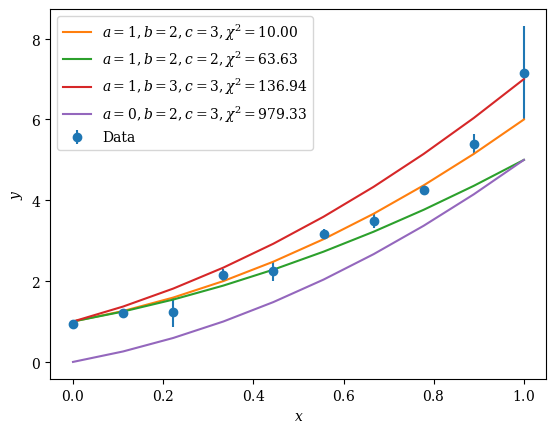

In [4]:
from numpy import linspace, abs
from numpy.random import normal
from matplotlib.pyplot import xlabel, ylabel, legend, plot, errorbar

x = linspace(0,1,10)
a = 1
b = 2
c = 3
y = a + b * x + c * x**2
e = [normal(0,yi/10) for yi in y]
y += e

def f(x,a,b,c):
    return a+b*x+c*x**2

errorbar(x,y,abs(e),fmt="o",label="Data")

for p in [(1,2,3),(1,2,2),(1,3,3),(0,2,3)]:
    chi2,nu = chi2nu(x,y,f,p,e)
    
    plot(x,f(x,*p),label=fr"$a={p[0]},b={p[1]},c={p[2]},\chi^2={chi2:.2f}$")
    
xlabel(r"$x$")
ylabel(r"$y$")
legend();

## Lineære modeller 

Hvis vores funktion $f$ er lineær i parametrene $\hat\theta$ siger vi at vi har en lineær model.  Eksempler på funktioner der er lineære i parametrene er 

## Linear models

If our function $f$ is linear in the parameters $\hat\theta$ we say we have a linear model. Examples of functions that are linear in the parameters are

\begin{align*} 
    &a x + b              & \text{hvor} && \hat\theta&=\{a,b\}\\
    &a x^2 + b x + c      & \text{hvor} && \hat\theta&=\{a,b,c\}\\
    &a e^{-x} + b \log(x) & \text{hvor} && \hat\theta&=\{a,b\}\quad.
\end{align*}

Generelt har vi at en lineær model kan skrives som 

In general, we have that a linear model can be written as

$$ f(x;\hat\theta) = \sum_{i=1}^{N_f} \hat\theta_i f_i(x)\quad,$$

hvor hver funktion $f_i$ er uafhængig af $\hat\theta$, eller 

where each function $f_i$ is independent of $\hat\theta$, or

$$ \forall \hat\theta_j\in\hat\theta : \frac{\partial f_i}{\partial \hat\theta_j} = 0\quad.$$ 

Er vores model af denne type kan vi opskrive løsningen til vores minimeringsproblem i form af en _matrix_ ligning 

If our model of this type we can write the solution to our minimization problem in the form of a _matrix_ equation

$$
b^T = \hat\theta^T A\quad,
$$

hvor vektoren $b$ har $N_f$ komponenter givet ved 

where the vector $b$ has $N_f$ components given by

$$ b_j = \sum_{i=1}^N \frac{y_i f_j(x_i)}{\delta_i^2}\quad,$$

Vektoren $\hat\theta$ er vores parametre, og den _symmetriske_ matrix $A$ er givet ved 

the vector $\hat\theta$ is our parameters, and the _symmetric_ matrix $A$ is given by

$$ A_{kj} = \sum_{i=1}^N \frac{f_k(x_i)f_k(x_i)}{\delta_i^2}\quad.$$ 

Løsningen er da givet ved 

The solution is then given by

$$ \hat\theta^T = b^T A^{-1}\quad,$$

eller 

or

$$ \hat\theta_k = \sum_{j=1}^{N_f} (A_{kj})^{-1} \sum_{i=1}^{N} \frac{y_i f_j(x_i)}{\delta_i^2}\quad.$$

For at finde $\hat\theta$ skal vi altså "bare" inverterer matrixen $A$.  Desuden har vi at $A^{-1}$ er kovariansen mellem parametrene så at usikkerheden på $\hat\theta_k$ er givet ved 

In order to find $\hat\theta$ we "only" need to invert the matrix $A$. Furthermore, we have that $A^{-1}$ is the covariance between the parameters so that the uncertainty of $\hat\theta_k$ is given by

$$\delta_{p_k} = \sqrt{(A_{kk})^{-1}}\quad.$$

### Eksempel: Lineær model

Her vil vi tilpasse funktionen 

### Example: Linear model

Here we will fit the function

$$ f(x;\theta) = \theta_1 + \theta_2 x + \theta_3 x^2\quad,$$ 

til målinger af temperaturen $T$ som funktion af spændingen fra en termoelement (engl. [_thermocouple_](https://en.wikipedia.org/wiki/Thermocouple), data fra [_Bevington_](http://highered.mheducation.com/sites/0072472278/index.html)).  Vi har at 

to measurements of temperature $T$ as a function of the voltage from a [_thermocouple_](https://en.wikipedia.org/wiki/Thermocouple), data from [_Bevington_](http://highered.mheducation.com/sites/0072472278/index.html)). We have that

\begin{align*}
  f_1(x) &= 1\\
  f_2(x) &= x\\
  f_3(x) &= x^2\quad.
\end{align*}

Vi vil bruge funktionen `numpy.linalg.lstsq` til af finde $\hat\theta$.  Denne funktion forventer målingerne $y_i$ (her vores spænding) skaleret med usikkerheden, og matrixen 

We will use the function `numpy.linalg.lstsq` to find $\hat\theta$. This function expects the measurements $y_i$ (here our voltage) scaled with the uncertainty, and the matrix

$$
\begin{bmatrix}
  f_1(x_1)/\delta_1 & f_2(x_1)/\delta_1 & f_3(x_1)/\delta_1\\
  \vdots & \vdots & \vdots\\
  f_1(x_N)/\delta_N & f_2(x_N)/\delta_N & f_3(x_N)/\delta_N
\end{bmatrix}\quad,
$$

som vi må beregne. Vi estimerer usikkerheden på hver måling af $V$ til $\delta_V=0.05$. 

which we must calculate. We estimate the uncertainty of each measurement of $V$ for $\delta_V=0.05$.

In [5]:
from numpy import arange, ones_like, array
from numpy.linalg import lstsq

T = arange(0,105,5)
V = [-.849, -.738, -.537, -.354, -.196, -.019, 0.262, 
     0.413, 0.734, 0.882, 1.258, 1.305, 1.541, 1.768, 
     1.935, 2.147, 2.456, 2.676, 2.994, 3.200, 3.318]
eV = ones_like(V)*0.05

fT = array([[1, x, x**2]/eV[i] for i, x in enumerate(T)])
p, *_ = lstsq(fT,V/eV,rcond=-1)

Lad os beregne $\chi^2$, $\nu$, og kovariancen for denne kurvetilpasning 

Let's calculate $\chi^2$, $\nu$, and the covariance for this curve fit

In [6]:
from numpy import matrix, sqrt, diagonal, dot
from numpy.linalg import inv 

chi2, nu = chi2nu(T,V,lambda x,a,b,c : a+b*x+c*x**2, p, eV)
covar    = matrix(dot(fT.T,fT)).I
covar    = inv(fT.T @ fT)

print(f"chi^2/nu: {chi2:.1f} / {nu:d} = {chi2/nu:.2f}")
for pv, pe, in zip(p,sqrt(diagonal(covar))):
    print_result(pv, pe)

chi^2/nu: 26.6 / 18 = 1.48
   -0.92 +/-     0.03
   0.038 +/-    0.001
 0.00005 +/-  0.00001


I koden ovenover skal vil holde tungen lidt lige i munden, så lad os skrive en funktion der gør det for os.  Vores funktion vil tage som input 

- $x$ vores uafhængige variabel 
- $y$ Vores afhængige variabel 
- $\delta$ Usikkerheden i $y$.  Hvis vi ikke giver nogen antager vi usikkerhederne alle er 1. 
- $\{f_j | j\in[1,\ldots,N_f]\}$ altså en sekvens af hvert led i den lineære funktion

Funktionen vil returnerer 

- $\hat\theta$ Estimatet af parametrene 
- $C$ Kovarians matrixen 

In the code above, will need to by rather meticolous, so let's write a function that does it for us. Our function will take as input

- $x$ our independent variable
- $y$ our dependent variable
- $\delta$ uncertainty in $y$. If we give none, we assume the uncertainties are all 1.
- $\{f_j | j\in[1,\ldots,N_f]\}$, that is, a list of each term in the linear function

The function will return

- $\hat\theta$ The estimate of the parameters
- $C$ The covariance matrix

In [7]:
def lin_fit(f,x,y,delta=None):
    from numpy import ones_like, matrix, array, dot
    from numpy.linalg import lstsq, inv
    
    if delta is None:
        delta = ones_like(y)
        
    if len(x) != len(y):
        raise ValueError("X and Y must have equal length")
        
    fx = array([[fj(xi)/ey for fj in f] 
                for xi,ey in zip(x,delta)])
    
    p, *_ = lstsq(fx, y/delta,rcond=-1)
    
    # pcov = matrix(dot(fx.T, fx)).I
    pcov = inv(fx.T @ fx)
    
    return p, pcov

linfit = lin_fit

Lad os gentage vores kurvetilpasning med denne funktion. 

Let's repeat our curve fitting with this feature.

In [8]:
f = [lambda x: ones_like(x), lambda x: x, lambda x: x**2]
p, covar = lin_fit(f,T,V,eV)

Lad os plotte resultatet.  Da vi kommer til at plotte mange af denne slags figurer - altså med data og en tilpasset kurve, vil vi definerer en funktion der gør det for os.

Let's plot the result. Since we are going to do many of these kinds of plots - i.e., plot of  data and a fitted curve, we will define a function that does it for us.

Vi vil definerer denne function `plot_fit` via en række andre funktioner.  Nogle af disse er lidt komplekse, så man kan springe dem over i læsningen.   Funktionerne kan kaldes uafhængigt af `plot_fit`.  Den første funktion tegner en tabel af  parametre værdier, og som tilvalg $\chi^2/\nu$, og $p$-værdien af $\chi^2_{\nu}$.  Parametrene usikkerhederne afrundes til et antal betydende cifre, og værdierne afrundes til samme præcision.  Vi kan også skaleres og evt. gives enheder.

We will define this function `plot_fit` via a number of other functions. Some of these are a bit complex, so you can skip them in the reading. The functions can be called independently of `plot_fit`. The first function draws a table of parameter values, and optionally $\chi^2/\nu$, and the $p$ value of $\chi^2_{\nu}$. The uncertainty parameters are rounded to a number of significant digits and the values are rounded to the same precision. We can also scale and possibly give units.

In [9]:
def plot_fit_table(p,ep,nsig=1,
                   chi2nu=None,pvalue=None,
                   parameters=None,**kwargs):
    from matplotlib.pyplot import gca
    from numpy import floor, log10, abs, ndim, sqrt, diagonal, atleast_1d
    from scipy.stats import chi2 
    
    cells = []
    
    title  = kwargs.pop('title',{})
    if title:
        if isinstance(title,str):
            title = {'label':title}
        
    tit = title.get('label',None)
    if tit:
        cells  += [[tit,'','','','','']]
        
    # Calculate chi^2 and nu, and add to lines
    if chi2nu is not None:
        chisq, nu = chi2nu
        cells += [[r"$\chi^2/\nu$", "=", 
                   fr"${chisq:.1f}/{nu}$", "=",
                   fr"${chisq/nu:.2f}$", ""]]

        if pvalue is not None and pvalue:
            prob  =  chi2.sf(*chi2nu)
            cells += [[r"$P(\chi^2,\nu)$", "=",
                       "", "",
                       fr"${100*prob:.1f}$", r"$\%$"]]

    # Add parameter values to lines 
    if parameters is None:
        parameters = {'label':'auto'}
    if isinstance(parameters,dict):
        pars = [parameters.copy() for _ in range(len(p))]
    elif len(parameters) < len(p):
        pars = parameters.copy() + \
               [{'label':'auto'} for _ in range(len(p)-len(parameters))]
    else:
        pars = parameters.copy()
        
    for pi in range(len(pars)):
        if isinstance(pars[pi],str):
            pars[pi] = dict(label=pars[pi])
        if not isinstance(pars[pi],dict):
            print('Warning, parameter options not dict')
        if 'label' not in pars[pi] or pars[pi]['label'] == 'auto':
            pars[pi]['label'] = f'p_{{{pi+1}}}'
    
    if ep is None:
        ep = [None]*len(p)
    elif ndim(ep) == 2:
        ep = sqrt(diagonal(ep))
    else:
        ep = atleast_1d(ep)
        
    for pi, (pv, pe, po) in enumerate(zip(p, ep, pars)):
        if isinstance(po,str):
            po = dict(label=po)

        ns             =  po.get('nsig', nsig)
        pn             =  po.get('label')
        pt             =  po.get('expo',po.get('scale',None))
        pu             =  po.get('unit', '')
        rv,re,ndig,rx  =  round_result_expo(pv,pe,ns,expo=pt)
        expo           =  rx is not None and rx != 0
        unit           =  pu is not None and pu != ''
        lp,rp          =  ('(',')') if (unit or expo) and pe else ('','')
        pu             =  fr'$\times10^{{{rx}}}$ {pu}' if expo else pu
        pm             =  r'$\pm$'                     if pe is not None else ''
        te             =  fr"${re:.{ndig}f}{rp}$"      if pe is not None else ''
        cells += [[fr"${pn}$", "=", fr"${lp}{rv:.{ndig}f}$", pm, te, pu]]

    axes = kwargs.pop('ax',   kwargs.pop('axes',gca()))
    col  = kwargs.pop('color','k')
    if 'edges' not in kwargs: kwargs['edges'] = ''
    if 'loc'   not in kwargs: kwargs['loc']   = 'best'
        
    tab = axes.table(cellText=cells,axes=axes,**kwargs)                  

    for i in range(6):
        tab.auto_set_column_width(i)
    
    align = ['left','center','right','center','left','left']
    
    for c,r in tab.get_celld():
        # print(c,r)
        tab[c,r]._loc = align[r]
        tab[c,r].set_text_props(color=col)
        
    if title is not None:
        tab[0,0].set_text_props(**title)
        tab[0,0].get_required_width = lambda r: 0
        
    return tab

Den næste funktion tegner funktionen vi har tilpasset med de fundne parametre værdier og evt. med et usikkerhedsbånd omkring. 

The next function draws the function we have fitted with the found parameters values and possibly with an uncertainty band around.

In [10]:
def plot_fit_func(x,f,p,cov,**kwargs):
    from matplotlib.pyplot import gca 
    from numpy import ndim, sqrt, diagonal
    
    ax      = kwargs.pop('ax',     gca())
    band    = kwargs.pop('band',   kwargs.pop('band_kw',True))
    
    fy = f(x,*p)
    if band and cov is not None:
        band_kw = {}
        if isinstance(band,dict):
            band_kw = band 
            
        bs = band_kw.pop('step_factor',1)
        ef = band_kw.pop('factor',     1)
        if 'alpha' not in band_kw: band_kw['alpha'] = 0.5
        if 'color' not in band_kw: band_kw['color'] = 'y'
        
        ee = cov 
        if ndim(cov) == 2:
            ee = sqrt(diagonal(cov))
            
        # f is a function of the parameters for the purpose 
        # of propagating uncertainties from the parameters
        fe = sqrt(propagate_uncertainty(lambda p:f(x,*p),p,ef*cov,bs*ee))
        ax.fill_between(x,fy-fe,fy+fe,**band_kw)
    
    
    return ax.plot(x,fy,**kwargs) # Plot fit

Endelig kan vi sætte vores `plot_fit` funktion sammen.  Denne funktion tegner data, den tilpasset funktion, og en tabel af parametre.  Vi kan tilpasse grafen med en masse tilvalg. 

Finally, we can put our `plot_fit` function together. This function draws data, the fitted function, and a table of parameters. We can customize the graph with a lot of options.

In [11]:
def plot_fit(x,y,delta,f,p,ep,xdelta=None,df=None,**kwargs):
    
    from numpy import sqrt, isscalar, diag, ndim, shape, array, \
        atleast_1d, asarray, concatenate, diagonal
    from matplotlib.pyplot import gca, sca, errorbar 
    from scipy.stats import chi2 as chi2
    
    def v2kw(v,strkey='label'):
        if isinstance(v,dict):
            return v
        if isinstance(v,str):
            return {strkey:v}
        return dict()
    
    axes  = kwargs.pop('axes',   gca())
    axes  = kwargs.pop('ax',     axes)
    ochi2 = kwargs.pop('chi2',   True)
    opval = kwargs.pop('pvalue', True)
    nsig  = kwargs.pop('nsig',   1)
    xx    = kwargs.pop('xeval',  x)
    
    pars  = kwargs.pop('parameters', kwargs.pop('pnames', []))
    legn  = kwargs.pop('legend',     kwargs.pop('leg_kw', True))
    band  = kwargs.pop('band',       kwargs.pop('band_kw',True))
    fit   = kwargs.pop('fit',        kwargs.pop('fit_kw', True))
    table = kwargs.pop('table',      kwargs.pop('tbl_kw', True))
    data  = kwargs.pop('data',       kwargs.pop('data_kw',True))
    depc  = kwargs.pop('pscales', False)
    if depc:
        print('Warning: pscales is deprecated, use parameters instead')
    
    
    if delta is None:
        delta = sqrt(y)
    
    delta  = atleast_1d(delta)
    rdelta = delta 
    if ndim(delta) > 1 and delta.shape[0] == 2:
        rdelta = delta.T
        
    if len(x) != len(y):
        raise ValueError("Inconsistent sizes of X and Y")
    if len(rdelta) != len(y):
        raise ValueError(f"Inconsistent sizes of Y {y.shape} and Delta {delta.shape}")
    if not callable(f):
        raise ValueError("F is not callable")
        
    rdelta = delta
    if ndim(delta) > 1 and delta.shape[1] == 2:
        rdelta = delta.T
    
    p  = atleast_1d(p)
    ee = None
    if ep is not None:
        ep = atleast_1d(ep)
        if ndim(ep) > 2:
            raise ValueError('Passed uncertainty dimensions larger than 2')
        elif ndim(ep) == 1:
            if ep.shape != p.shape:
                raise ValueError(f'Inconsistent sizes of P ({p.shape}) '
                                 f'and uncertainty on P ({ep.shape})')
            ep = diag(ep**2)
        elif ep.shape != (len(p),len(p)):
            raise ValueError(f'Inconsistent sizes of P ({p.shape}) '
                             f'and covariance on P ({ep.shape})')
        ee = sqrt(diagonal(ep))
        
    data_kw = v2kw(data)
    if xdelta is not None and 'xerr' not in data_kw:
        data_kw['xerr'] = xdelta

    dat = None
    if data:
        oldax = gca()
        sca(axes)
        plt = data_kw.pop('plot',errorbar)
        dat = plt(x,y,rdelta,**data_kw)  # Plot the data
        sca(oldax)
        
    
    # Eval function at points
    xerr = data_kw.get('xerr',xdelta)
    if xerr is not None:
        xerr = atleast_1d(xerr)
        if xx is x:
            xx = concatenate(([xx[0]-xerr[0]],xx,[xx[-1]+xerr[-1]]))
        
    fit_kw = v2kw(fit)
    ft     = None
    if fit:
        ft = plot_fit_func(xx,f,p,ep,ax=axes,band=band,**fit_kw)
    
    tab = None
    if table:
        chisqnu = None
        if ochi2:
            if isinstance(ochi2,bool):
                chisqnu = chi2nu(x,y,f,p,delta,xdelta,df,df_step=xdelta)
            else:
                chisqnu = ochi2,len(x)-len(p)
            
        tab = plot_fit_table(p,ee,chi2nu=chisqnu,pvalue=opval,ax=axes,
                             parameters=pars,nsig=nsig,**v2kw(table,'title'))
        
    leg = None
    leg_kw = v2kw(legn)
    if legn and ("label" in data_kw or "label" in fit_kw):
        if 'loc' not in leg_kw: leg_kw['loc'] = 'best'
        leg = axes.legend(**leg_kw)
        
    return (dat, fit, tab, leg)

Koden oven over er lang, men da vi vil bruge funktionaliteten igen og igen skal det hurtigt vise sig at være det værd. 

Efter al den kode kan vi endelig tegne vores fit. 

The code above is long, but since we want to use the functionality over and over again, it will quickly prove worthwhile.

After all that code, we can finally draw our fit.

Lineær mindste-kvadrat kurvetilpasning til data.  Båndet om kurven viser usikkerheden i parametrene.

Linear least-squares curve fitting to data. The band about the curve shows the uncertainty in the parameters.

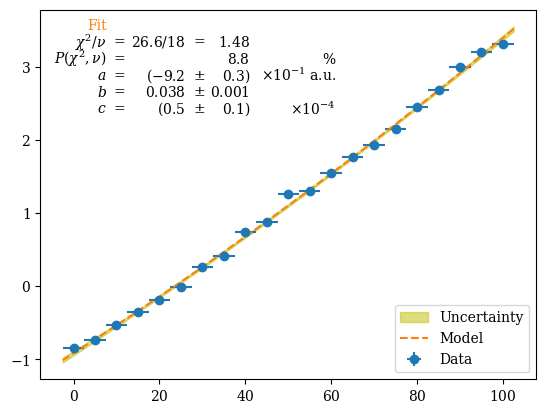

In [12]:
def ff(x,*p):
    from numpy import sum 
    return sum(array([pj*fj(x) for pj,fj in zip(p,f)]),axis=0)

plot_fit(T,V,eV,ff,p,covar,
         parameters=[{'label':'a','scale':'auto','unit':'a.u.'},
                      'b', {'label':'c','scale':-4}],
         data={"label":"Data",'xerr':2.5,'fmt':'o'},
         fit={"label":"Model",'ls':'--'},
         band={'label':'Uncertainty'},
         table={'title':{'label':'Fit','color':'C1'},'loc':'upper left'},
         legend={"loc":'lower right'});

## Residualer 

## Residuals

_Residualerne_ $r_i$ mellem en funktion $f$ og data punkterne $\{(x_i,y_i,\delta_i)\,|\,i=1,\ldots,N\}$ hvor $\delta_i$ er usikkerheden på $y_i$, er givet ved 

$$r_i = \frac{y_i - f(x_i)}{\delta_i}\quad.$$ 

Hvis vi antager at $f(x_i)$ giver os den "sande" værdi af $y$ og at $y_i$ er normalfordelt med 

$$y_i\sim\mathcal{N}[f(x_i),\sigma_i]\quad,$$ 

og at $\delta_i$ er et estimat af standard afvigelsen $\sigma_i$, så forventer vi at 

$$P(|r_i|<z) = \int_{-z}^{z}\mathrm{d}z'\,\frac{1}{\sqrt{2\pi}}e^{-\frac12z'^2}\quad.$$ 

Eller måske mere genkendeligt at der er cirka $65\%$ chance for at $|r_i|<1$ og $95\%$ for at $|r_i|<2$.  Vi derfor udregne hvor stor en del af residualerne ligger indenfor disse grænse og vi kan _forvente_ at de passer nogenlunde med de tal.   Det er dog en _forventning_ - det vil sige at det kun er opfyldt i grænsen $N\rightarrow\infty$.   Hvis $N$ er lille så er det rimeligt at antage at brøkdelen af residualer ikke passer helt med forventningen. 

_The residuals_ $r_i$ between a function $f$ and the data points $\{(x_i,y_i,\delta_i)\,|\,i=1,\ldots,N\}$ where $\delta_i$ is the uncertainty of $y_i$ is given by

$$r_i = \frac{y_i - f(x_i)}{\delta_i}\quad.$$

Assuming that $f(x_i)$ gives us the "true" value of $y$ and that $y_i$ is normal distributed with

$$y_i\sim\mathcal{N}[f(x_i),\sigma_i]\quad,$$

and furthermore that $\delta_i$ is an estimate of the standard deviation $\sigma_i$, then we expect that

$$P(|r_i|<z) = \int_{-z}^{z}\mathrm{d}z'\,\frac{1}{\sqrt{2\pi}}e^{-\frac12z'^2}\quad.$$

Or maybe more recognizable that there is about $65\%$ chance to $|r_i|<1$ and $95\%$ to $|r_i|<2$. We therefore calculate how much of the residuals are within these boundaries and we can _expect_ that they fit roughly with these numbers. However, it is an _expectation_ - that is, it is only met in the $N\rightarrow\infty$ limit. If $N$ is small then it is reasonable to assume that the fraction of residuals does not quite match expectations.

Lad os udregne residualerne af vores data mod vores kurvetilplasning fra ovenover.  Først vil vi dog definerer en funktion `residuals` der udregner residualer generelt

Let's calculate the residuals of our data against our curve fit from above. First, however, we will define a function `residuals` that computes residuals in general

In [13]:
def residuals(x,y,f,p,ey=None):
    from numpy import atleast_1d, ones_like
    ee = ones_like(x) if ey is None else atleast_1d(ey)
    mm = ee != 0
    ee = ee[mm]
    xx = atleast_1d(x)[mm]
    yy = atleast_1d(y)[mm]
    rr = (y - f(x,*p)) / ee 
    return xx, rr 

Bemærk at vi eksplicit filtrerer alle punkter hvor usikkerheden er nul ud.  Det gør vi ikke alene fordi vi ellers ville få uendeligheder, men også fordi at en forsvindende usikkerhed er tegn på at punktet slet ikke er bestemt. 

Vi tegner vores residualer fra den forrige kurvetilpasning

Note that we explicitly filter all points where the uncertainty is zero. We do this not only because we would otherwise have infinities, but also because a vanishing uncertainty is a sign that the point is not at all determined.

We draw our residuals from the previous curve adjustment

Residualer til data fra kurvetilpasning. Linjerne viser $\pm1$ og $\pm2$ usikkerheder væk fra kurven.

Residuals for curve fitting data. The lines show $\pm1$ and $\pm2$ uncertainties away from the curve.

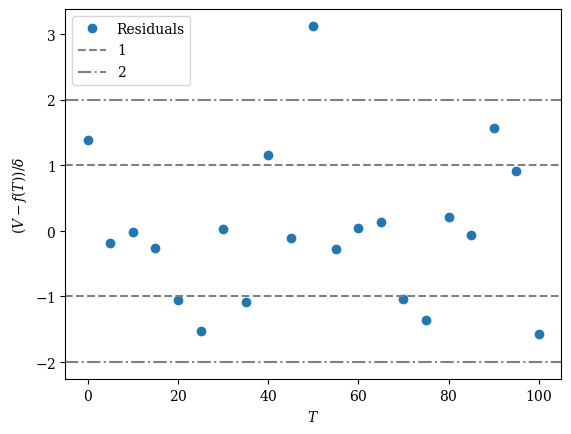

In [14]:
from matplotlib.pyplot import axhline 

xr, r = residuals(T,V,ff,p,eV)

plot(xr,r,'o',label='Residuals')
for n, ls in zip([1,2],['--','-.']):
    axhline(+n,ls=ls,color='gray',label=fr'${n}$')
    axhline(-n,ls=ls,color='gray')

xlabel(r'$T$')
ylabel(r'$(V-f(T))/\delta$')
legend(loc='upper left');

Som vi ser af figuren er der få residualer der ligger udenfor $[-1,1]$ og endnu færrere udenfor $[-2,2]$.   Vi kan beregne brøkdelen af punkter indenfor de to intervaler 

As we can see from the figure, there are few residuals outside $[-1,1]$ and even fewer outside $[-2,2]$. We can calculate the fraction of points within the two intervals

In [15]:
from numpy import abs

for n in [1,2]:
    m = len(r)
    s = (abs(r) < n).sum()
    print(f'{s:<2d} out of {m:2d} residuals within [-{n},{n}]: {s/m*100:5.1f}%')

11 out of 21 residuals within [-1,1]:  52.4%
20 out of 21 residuals within [-2,2]:  95.2%


Med tanke på at vi har 21 punkter er de andele af punkter vi finder ganske rimelige - 21 er ikke specielt mange punkter.  

Lad os endelig lave en funktion der kan visualisere residualerne sammen med usikkerheden på $f(x_i)$ skaleret med usikkerheden i $y_i$

Given that we have 21 points, the proportions of points we find quite reasonable - 21 are not very many points.

Finally, we create a function that can visualize the residuals along with the uncertainty of $f(x_i)$ scaled with the uncertainty of $y_i$

In [16]:
def plot_residual(x,y,f,p,cov=None,ey=None,**kwargs):
    from matplotlib.pyplot import plot, fill_between, gca
    from numpy import atleast_1d, ones_like, sqrt
    
    res = kwargs.pop('residuals',True)
    fun = kwargs.pop('function', True)
    ax  = kwargs.pop('ax',kwargs.pop('axes', gca()))
    
    def v2kw(v,strkey='label'):
        if isinstance(v,dict):
            return v
        if isinstance(v,str):
            return {strkey:v}
        return dict()
    
    ra = None
    if res:
        res_kw = v2kw(res)
        rx, r = residuals(x,y,f,p,ey)
        ra = plot(rx, r, **res_kw)
        
    fa = None
    if fun and cov is not None:
        fun_kw = v2kw(fun)
        if 'color' not in fun_kw: fun_kw['color'] = 'y'
        if 'alpha' not in fun_kw: fun_kw['alpha'] = 0.5
            
        ee = ones_like(x) if ey is None else atleast_1d(ey)
        mm = ee != 0
        ee = ee[mm]
        xx = atleast_1d(x)[mm]
        yy = atleast_1d(y)[mm]
        ff = sqrt(propagate_uncertainty(lambda p : f(xx,*p), p, cov)) / ee
        
        fa = fill_between(xx,-ff,ff,**fun_kw)
        
    return ra, fa

Vi plotter vores tidligere kurvetilpasning med `plot_fit` og residualerne med `plot_residual` i samme figur med `subplots`. 

We plot our previous curve fit with `plot_fit` and the residuals with `plot_residual` in the same figure with `subplots`.

Data og kurvetilpasning (øverst) og residualer (nederst).

Data and curve fitting (top) and residuals (bottom).

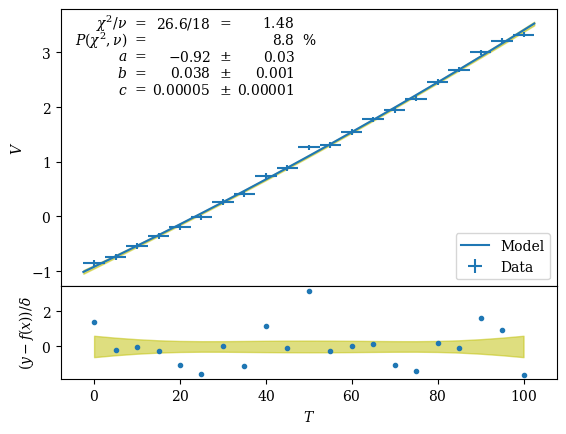

In [17]:
from matplotlib.pyplot import subplots

fig, ax = subplots(nrows=2,sharex=True,
                   gridspec_kw=dict(hspace=0,height_ratios=(3,1)))
plot_fit(T,V,eV,ff,p,covar,ax=ax[0],
         parameters=['a','b','c'],
         data={"label":"Data",'fmt':'none','xerr':2.5},
         table={'loc':'upper left'},
         fit="Model",
         legend={'loc':'lower right'})
plot_residual(T,V,ff,p,covar,eV,ax=ax[1],
              residuals={'label':'Residuals','marker':'.','ls':'none'},
              function={'label':'Model'})
ax[1].set_xlabel(r'$T$')
ax[1].set_ylabel(r'$(y-f(x))/\delta$')
ax[0].set_ylabel(r'$V$');

## Ikke-lineær modeller

For ikke-lineære modeller, det vil sige, modeller for hvilke vi ikke kan opskrive funktionen som en sum som ovenover, har vi ikke en analytisk løsning til minimering af $\chi^2$.  Vi må i stedet ty til numeriske og iterative metoder.  Vi vil ikke gå i detaljer med de forskellige metoder her.  De fleste metoder afsøger mulighedsrummet for parameterværdierne, ofte ved brug af _gradienten_ af $\chi^2$ med hensyn til parametrene 

## Nonlinear models

For non-linear models, that is, models for which we cannot write the function as a sum of terms as above, we do not have an analytical solution to minimize $\chi^2$. Instead, we must resort to numerical and iterative methods. We will not go into detail with the various methods here. Most methods search the domain of the parameter values, often using the _gradient_ of $\chi^2$ with respect to the parameters

$$ \nabla \chi^2(p) = \begin{bmatrix} 
    \frac{\partial \chi^2}{\partial \hat\theta_1}\\
    \vdots\\ 
    \frac{\partial \chi^2}{\partial \hat\theta_N}
    \end{bmatrix}\quad.
$$

Generelt finder vi, med 

In general, we find, with

$$
r(p;x,y,\delta) = \frac{y - f(x,\hat\theta)}{\delta}
$$

at 

that

\begin{align*}
\frac{\partial\chi^2(\hat\theta)}{\partial \hat\theta_j}
&= \sum_{i=1}^{N}\frac{\partial r^2(p;x_i,y_i,\delta_i)}{\partial \hat\theta_j}\\
&= \sum_{i=1}^{N}2r(\hat\theta;x_i,y_i,\delta_i)\frac{\partial r(\hat\theta;x_i,y_i,\delta_i)}{\partial \hat\theta_j}\\
&= \sum_{i=1}^{N}-2r(\hat\theta;x_i,y_i,\delta_i)\frac1{\delta_i}\frac{\partial f(x;\hat\theta)}{\partial \hat\theta_j}\quad,
\end{align*}

hvor det sidste lighedstegn følger af $y_i$ og $\delta_i$ er uafhængig af parametrene $\hat\theta$, så at 

where the last line follows from $y_i$ and $\delta_i$ are independent of the $\hat\theta$ parameters, so that

$$\frac{\partial r(\hat\theta;x,y,\delta)}{\partial \hat\theta_j} =
-\frac1{\delta}\frac{\partial f(x;\hat\theta)}{\partial \hat\theta_j}\quad.$$

Hvis vi kan bestemme gradienten analytisk kan det ofte forbedre kurvetilpasningen en hel del. 

If we can determine the gradient analytically, it can often improve the curve fitting a great deal.

### Eksempel: Kurvetilpasning med gradient-nedstigning 

I dette eksempel vil vi implementerer vores egen algoritme for kurvetilpasning for en ikke-lineær model.  Metoden vi vil bruge kaldes _gradient-nedstigning_ (engl. [_gradient descent_](https://en.wikipedia.org/wiki/Gradient_descent)) og benytter sig af gradient af $\chi^2$ for at minimerer dette. 

Koden her er ikke ment som egentlig kode til brug, men illusterer fint hvorledes kurvetilpasnings algoritmer virker. 

### Example: Curve fit with gradient descent

In this example, we will implement our own curve fitting algorithm for a non-linear model. The method we want to use is called [_gradient descent_](https://en.wikipedia.org/wiki/Gradient_descent) and uses the $\chi^2$ gradient to minimize $\chi^2$.

The code here is not meant to be the actual code for use, but illustrates well how curve-fitting algorithms work.

Vi vil tage tilfældige tal fra en normalfordeling og forsøge at tilpasse 

We will take random numbers from a normal distribution and try to fit

$$f(x;A,\mu,\sigma) = A\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac12\frac{(x-\mu)^2}{\sigma^2}}\quad,$$

til den prøve.  Funktionen $f$ er klart ikke lineær i parametrene $\mu$ og $\sigma$.  Vi vil minimerer 

to the sample. The function $f$ is clearly not linear in the $\mu$ and $\sigma$ parameters. We want to minimize

$$
\chi^2 = \sum_{i=1}^{N}\frac{\left(y_i - f(x_i;A,\mu,\sigma)\right)^2}{\delta_i^2}\quad,
$$

Vi finder gradient til $f$ er 

We find gradient of $f$ to be

$$
\nabla f(x;A,\mu,\sigma) = f(x;A,\mu,\sigma)
\begin{bmatrix}
 \frac{1}{A}\\
 \frac{x-\mu}{\sigma^2}\\
 \frac{(x-\mu)^2-\sigma^2}{\sigma^3}
 \end{bmatrix}\quad.
$$

Lad os lave en funktion `chi2gradNorm` som beregner _både_ $\chi^2$ og $\nabla\chi^2$ for given parametre $\hat\theta$ 

Let's write a function `chi2gradNorm` which calculates _both_ $\chi^2$ and $\nabla\chi^2$ for a given set of parameters $\hat\theta$

In [18]:
def gaus(x,A,mu,sigma):
    from numpy import sqrt, pi, exp
    return A/(sqrt(2*pi)*sigma) * exp(-0.5*(x-mu)**2/sigma**2)

def chi2gradNorm(x,y,delta,par):
    from numpy import sqrt, pi, exp, zeros_like, sum
    A, mu, sigma = par
    fx           = gaus(x,*par)
    r            = zeros_like(y)
    mask         = delta > 0
    r[mask]      = (y[mask]-fx[mask])/delta[mask]
    chi2         = sum(r**2)
    rr           = zeros_like(y)
    rr[mask]     = -2*r[mask]*fx[mask]/delta[mask]
    g            = sum([rr/A, 
                        rr*(x-mu)/sigma**2,
                        rr*((x-mu)**2-sigma**2)/sigma**3],
                       axis=1)
    return chi2, g

Vi har nu den funktion vi vil minimerer, plus vi får gradienten med.  Vores algoritme er nu som følger 

1. Tjek om $g_i = |\nabla\chi^2(\hat\theta_i)|<\varepsilon$.  
   - Hvis dette er tilfældet har vi fundet vores minimum $\hat\theta_i$ og vi er færdige
2. Ellers ændre vi parameterne i modsat retning af gradienten 

   $$ \hat\theta_{i+1} = \hat\theta_i - \gamma_i g_i\quad,$$ 
  
   hvor $\gamma_i$ er en skridt længde.  
  
3. Beregn gradienten 

   $$ g_{i+1} = \nabla\chi^2(\hat\theta_{i+1})\quad,$$ 
   
   med de nye parameter værdier $\hat\theta_{i+1}$. 
   
4. Beregn

    $$\gamma = \frac{(\hat\theta_{i+1}-\hat\theta_i)^T(g_{i+1}-g_i)}{|g_{i+1}-g_i|^2}\quad.$$
    
    Bemærk at vi her opfatter $\hat\theta$ som vektorer og nævneren ovenover er det indre (prik) produktet mellem vektorerne $\hat\theta_{i+1}-\hat\theta_i$ og $g_{i+1}-g_i$. 
    
5. Lad $i=i+1$ og gå tilbage til 1. 
    
Vi vil implementerer denne algoritme som en funktion

We now have the function we want to minimize, plus we get the gradient of the that function. Our algorithm is as follows

1. Check for $g_i = |\nabla\chi^2(\hat\theta_i)|<\varepsilon$.
   - If this is the case, we have found our minimum $\hat\theta_i$ and we have finished
2. Otherwise we change the parameters in the opposite direction of the gradient

   $$ \hat\theta_{i+1} = \hat\theta_i - \gamma_i g_i\quad,$$
  
   where $\gamma_i$ is a step length.
  
3. Calculate the gradient

   $$ g_{i+1} = \nabla\chi^2(\hat\theta_{i+1})\quad,$$
   
   with the new parameter values $\hat\theta_{i+1}$.
   
4. Calculate

    $$\gamma = \frac{(\hat\theta_{i+1}-\hat\theta_i)^T(g_{i+1}-g_i)}{|g_{i+1}-g_i|^2}\quad.$$
    
    Note we interpret $\hat\theta$ as a vector and the numerator above is the inner (dot) product between the vectors $\hat\theta_{i+1}-\hat\theta_i$ and $g_{i+1}-g_i$.
    
5. Let $i=i+1$ and go back to 1.
    
We will implement this algorithm as a function

In [19]:
def gradientDescent(f,p,gamma=1e-6,maxiter=1000,epsilon=1e-3,history=False):
    # Illustrational code only
    # Warning: Not for production.  
    # A production version of this code would use scipy.optimizer 
    from numpy import dot, array
    from numpy.linalg import norm
    p0        = None
    p1        = array(p)
    grad0     = None
    v0        = None
    v1, grad1 = f(p1)
    step      = 0
    
    phist = None
    vhist = None
    if history:
        phist = [p1]
        vhist = [v1]
        
    while norm(grad1) > epsilon and step < maxiter:
        p1, ptmp        = p1 - gamma * grad1, p1
        (v1, grad1),gradt,v0 = f(p1),grad1,v1
        if v1 > v0:
            gamma     /= 2
            p1        =  p0 - gamma * grad0
            v1, grad1 =  f(p1)
            continue
        p0 = ptmp
        grad0 = gradt
        
        dp = p1-p0
        dg = grad1-grad0    
        if norm(dg) > 1e-9:
            gamma         =  dot(p1-p0,grad1-grad0)/norm(grad1-grad0)**2
        step              += 1
        
        if phist is not None:
            phist.append(p1)
            vhist.append(v1)
    
    if step >= maxiter:
        raise RuntimeError("Did not converge in {} iterations".format(maxiter))
    
    if norm(grad1) > epsilon:
        raise RuntimeError("Failed to converge to {}".format(epsilon))
        
    if phist is None:
        return p1, grad1, None
    return p1, grad1, (array(phist), array(vhist))

Bemærk at denne algoritme betragter funktionen `f` som _alene_ afhængig af parametrene `p`.   I funktionen ovenover har argumenterne følgende betydning

- `f` er den funktion vi vil minimerer.  Algoritmen forventer at denne funktion returnerer 
  - $f(\hat\theta)$ for parametrene $\hat\theta$
  - $\nabla f(\hat\theta)$ for parametrene $\hat\theta$ 
- `p` er vores umiddelbare gæt på parametrene $\hat\theta_0$
- `gamma` er vores start skridtlængde $\gamma$
- `maxiter` er det maximale antal iterationer (gennemløb) vi tillader 
- `epsilon` er vores grænse $\varepsilon$ for hvornår vi har fundet minimumet 
- `history` er et tilvalg. Hvis denne er sand vil funktionen også returnerer historien af værdier og parametre som en tredje returværdi. 

Funktionen returnerer 

- `p` de fundne parameterværdier ved minimumet $\hat\theta$
- `grad` Gradienten ved minimumet 
- `None` eller `(phist,vhist)` hvis `history` er sand.  `phist` og `vhist` indeholder henholdvis parameter og værdi historien. 


Note that this algorithm considers the function `f` as _only_ depending on the parameters `p`. In the function above, the arguments have the following meaning

- `f` is the function we want to minimize. The algorithm expects this function to return
  - $f(\hat\theta)$ for the parameters $\hat\theta$
  - $\nabla f(\hat\theta)$ for the parameters $\hat\theta$
- `p` is our initial guess at the parameters $\hat\theta_0$
- `gamma` is our starting step length $\gamma$
- `maxiter` is the maximum number of iterations (passes) we allow
- `epsilon` is our limit $\varepsilon$ for when we have found the minimum
- `history` is an option. If this is true, the function will also return the history of values and parameters as a third return value.

The function returns

- `p` the parameter values found at the minimum $\hat\theta$
- `degree` gradient at minimum
- `None` or` (phist, vhist)` if `history` is true. `phist` and` vhist` each contain parameter and value history.

Vi trækker nu nogle tilfældige tal fra en normalfordeling med $\mu=3,\sigma=1$, og histogrammerer disse. 

We now draw some random numbers from a normal distribution with $\mu=3,\sigma=1$, and histograms these.

In [20]:
from numpy.random import seed, normal
seed(1234)

y, x, dx, ey = histogram(normal(3,1,size=1000),30,(0,6))

Dernæst definerer vi vores start gæt på parametrene $A,\mu,\sigma$ (sat til henholdsvis integralet af histogrammet, 2.5, og 0.5), og en funktion som folder vores histogram data ind i vores `chi2gradNorm` funktion.

Next, we define our start guess of the parameter values $A,\mu,\sigma$ (set to the integral of the histogram, 2.5, and 0.5, respectively), and a function that folds our histogram data into our `chi2gradNorm` function.

In [21]:
p0 = [(y*dx).sum(), 2, .5]
def toMin(p,x=x,y=y,ey=ey,dx=dx):
    return chi2gradNorm(x,y,ey,p)

Vi kan nu udfører vores kurvetilpasning.  Vi beholder historien så vi kan visualiserer den senere.  Vi beregner også $\chi^2$ og $\nu$ ved hjælp af vores funktion `chi2nu`. 

We can now perform our curve fitting. We keep the history so we can visualize it later. We also calculate $\chi^2$ and $\nu$ using our function `chi2nu`.

In [22]:
p, grad, hist = gradientDescent(toMin, p0, history=True, epsilon=1e-3)

For at visualiserer vores resultat laver vi en figur med to underpaneler.  I det første panel tegner vi data, vores tilpasset funktion, samt de fundne parametere og deres usikkerheder og det reduceret $\chi^2$.  Bemærk at usikkerheden på parametren $\hat\theta_j$ er givet ved 

To visualize our results, we make a figure with two sub-panels. In the first panel we draw data, our custom function, as well as the parameters found and their uncertainties and the reduced $\chi^2$. Note that the uncertainty of the $\hat\theta_j$ parameter is given by

$$\delta_{p_j} = \frac{\partial^2\chi^2}{\partial p_j^2}\quad,$$

som vi vil tilnærme med 

which we will approximate by

$$\delta_{p_j} \approx \frac{\nabla \chi^2_j}{|\nabla \chi^2|}\quad.$$

I det andet panel plotter vi historien af parametrene $\mu,\sigma$ - altså hvorledes de kommer tættere på minimumet. 

In the second panel, we plot the history of the $\mu,\sigma$ parameters - i.e., how they approach the minimum.

Kurvetilpasning af en ikke-lineær funktion til data ved brug af gradient nedstigning.  Til venste er data og kurvetilpasningen vist, mens plottet til højre viser $\chi^2$ som funktion af de to frie parametre $\mu$ og $\sigma$.  Linjen til højre viser algoritmens vej til det fundne minimum.

Curve fitting of a nonlinear function to data using gradient descent. To the left, data and the curve fit are shown, while the plot to the right shows $\chi^2$ as a function of the two free parameters $\mu$ and $\sigma$. The bar to the right shows the path of the algorithm to the found minimum.

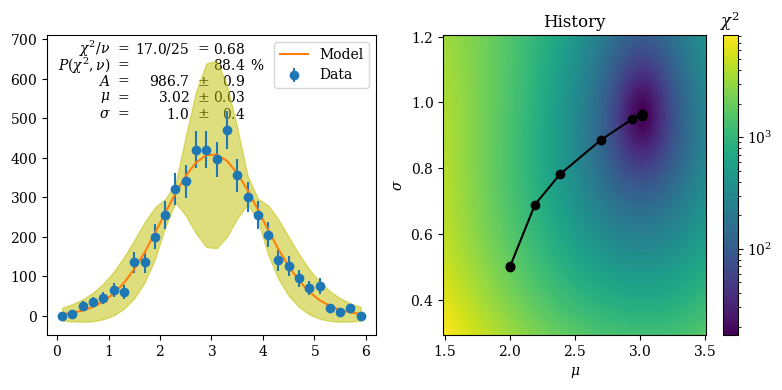

In [23]:
from numpy.linalg import norm 
from numpy import meshgrid 
from matplotlib.colors import LogNorm
from matplotlib.pyplot import colorbar, tight_layout

fig, ax = subplots(ncols=2,figsize=(8,4))
ep      = abs(grad)/norm(grad)
plot_fit(x,y,ey,gaus,p,ep,axes=ax[0],
        parameters=['A',r'\mu',r'\sigma'],
        data={"label":"Data",'fmt':'o'},
        fit={"label":"Model"},
        table={"loc":"upper left",'edges':''})
ax[0].set_ylim(None,710)

mmu, msigma = meshgrid(linspace(1.5,3.5,101),
                       linspace(.3,1.2,101))
chis, _ = chi2nu(x,y,gaus,[p[0],mmu,msigma],ey)


cc = ax[1].pcolormesh(mmu,msigma,chis,norm=LogNorm(),shading='auto')
plot(hist[0][:,1],hist[0][:,2],"-ok")
colorbar(cc).ax.set_title(r"$\chi^2$")
ax[1].set_xlabel(r"$\mu$")
ax[1].set_ylabel(r"$\sigma$");
ax[1].set_title("History")
tight_layout()

### General kurvetilpasning for ikke-lineære modeller 

Oven over brugte vi _gradient-nedstigning_ som løsning til en specifikt problem, nemlig tilpasning af en normal fordeling til data.  Selv om normalfordelingen ikke er lineær i parametrene. så er det stadig en funktion som er rimelig "pæn". 

### General curve fitting for non-linear models

Above, we used _gradient descent_ as a solution to a specific problem, namely fitting a normal distribution to data. Although the normal distribution is not linear in the parameters it is still a function that is reasonably well-behaved.

Andre gange er vi ikke så "heldige" at have en funktion som normalfordelingen, og gradient nedstigning er muligvis ikke en relevant metode for kurvetilpasningen.  Heldigvis har _SciPy_ en funktion som kan udfører kurvetilpasning til generelle ikke-lineære modeller.  Denne funktion er `scipy.optimize.curve_fit`.  Denne funktion tager 

- en prøve $\{(x_i,y_i,\delta_i)|i\in[1,\ldots,N],\ x_i\in X,\ y_i,\delta_i\in Y\}$
- en model i form af en funktion $f:X,\Theta\rightarrow Y$
- et start gæt på parametrene $\hat\theta_0\in \Theta$

Funktionen returner 

- Parameterværdierne $\hat\theta\in \Theta$ hvor $\chi^2$ er minimum 
- Kovariansmatrixen $C\in \Theta^2$ for parametrene $\hat\theta$

Usikkerheden på parametrene er givet ved kvadratroden af diagonalen af kovariansmatrixen $C$.  Funktionen beregner ikke $\chi^2$ for os, så til det formål vil vi bruge vores funktion `chi2nu`.  Bemærk også at `scipy.optimize.curve_fit` ikke virker hvis en eller flere af usikkerhederne er 0.  I så fald kan man maske de punkter ud hvor usikkerhederne er nul. Endelig vil vi typisk give nøgleordet `absolute_sigma=True`, idet vores usikkerheder på målepunkterne typisk er absolute, modsat _relative_, eller at vores usikkerheder på målepunkterne har samme enhed som punktværdierne. 

At other times, we are not so "lucky" to have a function as the normal distribution, and gradient descent may not be a relevant method for curve fitting. Fortunately, _SciPy_ has a function that can perform curve fitting to general non-linear models. This function is `scipy.optimize.curve_fit`. This function takes

- a sample $\{(x_i,y_i,\delta_i)|i\in[1,\ldots,N],\ x_i\in X,\ y_i,\delta_i\in Y\}$
- a model in the form of a $f:X,\Theta\rightarrow Y$ function
- a start guess of the parameter values $\hat\theta_0\in \Theta$

The function returns

- Parameter values $\hat\theta\in\Theta$ where $\chi^2$ is the minimum
- The covariance matrix $C\in \Theta^2$ for the $\hat\theta$ parameters

The uncertainty of the parameters is given by the square root of the diagonal of the covariance matrix $C$. The function does not calculate $\chi^2$ for us, so for that purpose we will use our function `chi2nu`.  Also note, that `scipy.optimize.curve_fit` does not work if one or more of the uncertainties are 0.  In that case, one can mask out data points that have a 0 uncertainty. Finally, we typically give the keyword argument `absolute_sigma=True`, since most often our measurement uncertainties are absolute, as opposed to _relative_, or that the uncertainties have the same units as the measured points. 

### Eksempel: Kurvetilpasning til top over baggrund

Vi har 4000 begivenheder fra et partikelfysik eksperiment.  

### Example: Curve fit to top over background

We have 4000 events from a particle physics experiment.

Top over baggrund.  Typisk invariant masse spektrum.

Peak over background. Typically invariant mass spectrum.

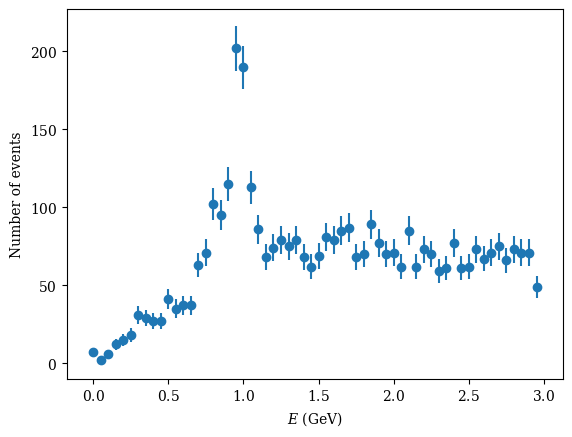

In [24]:
y = array([  7,   2,   6,  12,  15,  18,  31,  29,  27,  27,  41,  35,
            37,  37,  63,  71, 102,  95, 115, 202, 190, 113,  86,  68,
            74,  79,  75,  79,  68,  62,  69,  81,  79,  85,  87,  68,
            70,  89,  77,  70,  71,  62,  85,  62,  73,  70,  59,  61,
            77,  61,  62,  73,  67,  71,  75,  66,  73,  71,  71,  49])
ey = sqrt(y)
x  = linspace(0,3,len(y),endpoint=False)
ex = (x[1]-x[0])*ones_like(y)/2
errorbar(x,y,ey,ex,"o")
xlabel("$E$ (GeV)")
ylabel("Number of events");

Disse data viser en typisk resonance top ovenpå en kombinatorisk baggrund.  Toppen er typisk modelleret med en Breit-Wigner (eller Lorentz) fordeling, men baggrunden modellers med et andengradspolynomium

These data show a typical resonance peak on top of a combinatorial background. The top is typically modeled with a Breit-Wigner (or Lorentz) distribution, and the background is model by a second degree polynomial

$$f(E;a_1,a_2,a_3,A_0,\Gamma,E_0) = a_1 + a_2 E + a_3 E^2 + A_0 \frac{\Gamma/(2\pi)}{(E-E_0)^2+(\Gamma/2)^2}\quad.$$

Her reprænsenterer de tre første led vores baggrund, mens det fjerde led modellerer vores top.  Parametrene $E_0$ og $\Gamma$ er henholdsvis toppens midpunkt og _fulde brede ved halv højde_ (engl. 
[_full width at half maximum_](https://en.wikipedia.org/wiki/Full_width_at_half_maximum), forkt. FWHM). 

Lad os forsøge at tilpasse denne funktion til vores data. 

Here, the first three terms represent our background, while the fourth term models our peak. The parameters $E_0$ and $\Gamma$ are the peak midpoint and 
[_full width at half maximum_](https://en.wikipedia.org/wiki/Full_width_at_half_maximum) (FWHM), respectively.

Let's try to fit this funtion to our data.

Tilpasning af Briet-Wigner top og polynomisk baggrund til data.  Båndet om kurven viser usikkerheden i parametrene.

Fitting Briet-Wigner peak and polynomial background to data. The band around the curve shows the uncertainty in the parameters.

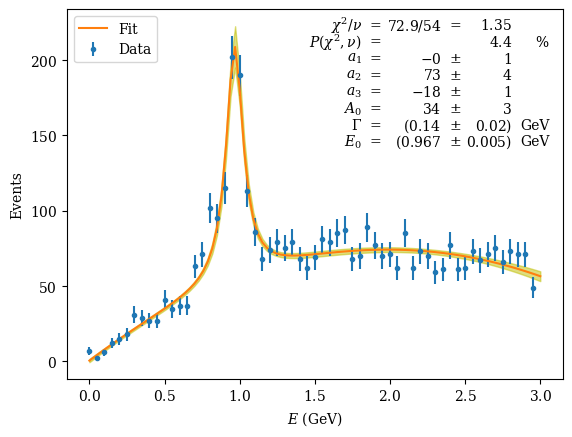

In [25]:
def peakBackground(x,a1,a2,a3,a0,gamma,e0):
    from numpy import pi 
    return a1+a2*x+a3*x**2+a0*(gamma/(2*pi))/((x-e0)**2+(gamma/2)**2)

from numpy import array 
from scipy.optimize import curve_fit

p0 = array([0,0,0,1,.1,1])
par = ["a_1","a_2","a_3","A_0",
       {'label':r"\Gamma",'unit':'GeV'},
       {'label':"E_0",    'unit':'GeV'}]

p, pcov = curve_fit(peakBackground,x,y,p0,ey,absolute_sigma=True)
plot_fit(x,y,ey,peakBackground,p,pcov,nsig=1,
         parameters=par,
         xeval=linspace(0,3,100),
         data={"label":"Data","fmt":"."},
         fit={"label":"Fit"})
xlabel("$E$ (GeV)")
ylabel("Events")
legend(loc='upper left');

Bemærk at vi i plottet ovenover har givet kovarians matrixen til plot funktion, sådan at usikkerhedsbåndet på plottet indholder korrelationen mellem vores parametre. 

Note that in the plot above we have given the covariance matrix to plot function, so that the uncertainty band on the plot contains the correlation between our parameters.

## Fit konjuturer 

Vi er interesseret i at illustrerer kovariansen mellem de tilpasset variable.  For eksempel kunne vi være interesseret i parametrene $A_0$ og $\Gamma$ fra det forrige eksempel.  Vi har 

## Fit contours

We are interested in illustrating the covariance between the fitted parameters. For example, we could be interested in the parameters $A_0$ and $\Gamma$ from the previous example. We have

In [26]:
A0,eA0       = p[3],sqrt(pcov[3,3])
Gamma,eGamma = p[4],sqrt(pcov[4,4])
cA0Gamma     = pcov[3,4]
print(f'A_0      = {A0:.0f} +/- {eA0:.0f}')
print(f'Γ        = {Gamma:.2f} +/- {eGamma:.2f}')
print(f'C(A_0,Γ) = {cA0Gamma:g}')

A_0      = 34 +/- 3
Γ        = 0.14 +/- 0.02
C(A_0,Γ) = 0.0266754


Vi kunne illusterer disse som en kasse i $A_0,\Gamma$ planet 

We could illustrate these as a box in the $A_0,\Gamma$ plane

Usikkerheder i fundne parametre som et rectangle i $A_0,\Gamma$ rummet.

Uncertainties in found parameters as a rectangle in the $A_0,\Gamma$ plane.

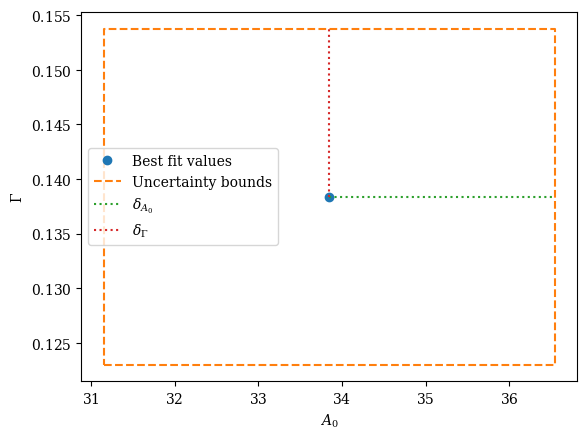

In [27]:
plot(A0,Gamma,'o',label='Best fit values')

rect = array([(A0+a*eA0,Gamma+b*eGamma) for 
               a, b in [[-1,-1],[1,-1],[1,1],[-1,1],[-1,-1]]])
aline = array([(A0,Gamma),(A0+eA0,Gamma)])
bline = array([(A0,Gamma),(A0,Gamma+eGamma)])

plot(rect[:,0],rect[:,1],'--',label='Uncertainty bounds')
plot(aline[:,0],aline[:,1],':',label=r'$\delta_{A_0}$')
plot(bline[:,0],bline[:,1],':',label=r'$\delta_{\Gamma}$')
xlabel(r'$A_0$')
ylabel(r'$\Gamma$')
legend();

Denne boks er dog ikke særlig informativ, da den ikke repræsenterer nogen specifik ændring i $\chi^2$ og dermed i $p$-værdien.   Et bedre alternativ er en såkaldt konfidens-kontour (engl. _Confidence contour_), som er bestemt ved en ændring i $\chi^2/\nu$, svarende til et antal ændringer i usikkerheden på hver parameter.   Denne kontour er generelt en ellipse i planet. 

However, this box is not very informative as it does not represent any specific change in $\chi^2$ and hence in the $p$ value. A better alternative is a so-called confidence contours, which are determined by a change in $\chi^2/\nu$, corresponding to changes in the by some number of uncertainty of each parameter. This contour is generally an ellipse in the planet.

If we know the correlation 

$$\rho_{ab} = \frac{C_{ab}}{\sqrt{C_{a}C_{b}}}\quad,$$ 

where $C_{ab}$ is the covariance of $a,b$ (variance of $a$ if $b=a$), then the ellipsis is described by the equation 

\begin{align*}
\frac{a^{2}}{\delta_{a}^{2}}+\frac{b^{2}}{\delta_b^{2}}-\frac{2ab}{\delta_a\delta_a}\rho&=1-\rho^{2}\quad.
\end{align*}

We can rewrite the above a little simpler.  First of all the major and minor axes radii $r,s$ are given by 

$$r = \sqrt{1+\rho}\quad s=\sqrt{1-\rho}\quad,$$

and we must rotate the ellipsis by $45^{\circ}$, scale by $n\delta_a,n\delta_b$, and translate to the found values.  Thus, our parametric curve for the $n\sigma$ contour becomes 

\begin{align*}
\begin{bmatrix} x\\ y\end{bmatrix} &=
\begin{bmatrix} 
n\delta_a\left(\sqrt{1+\rho}\cos t\cos 45^{\circ}-\sqrt{1-\rho}\sin t\sin 45^{\circ}\right)\\
n\delta_b \left(\sqrt{1+\rho}\cos t\sin 45^{\circ}+\sqrt{1-\rho}\sin t\cos 45^{\circ}\right)\\
\end{bmatrix}
+\begin{bmatrix}\hat a\\\hat b\end{bmatrix}\\
&= 
\frac{n}{\sqrt{2}}
\begin{bmatrix} 
\delta_a\left(\sqrt{1+\rho}\cos t-\sqrt{1-\rho}\sin t\right)\\
\delta_b\left(\sqrt{1+\rho}\cos t+\sqrt{1-\rho}\sin t\right)\\
\end{bmatrix}
+\begin{bmatrix}\hat a\\\hat b\end{bmatrix}\\
\end{align*}

Hvis vi kender correlationen

$$\rho_{ab} = \frac{C_{ab}}{\sqrt{C_{a}C_{b}}}\quad,$$

hvor $C_{ab}$ er kovariansen mellem $a,b$ (variansen af $a$ hvis $b=a$), beskrives ellipsen af ligningen

\begin{align*}
\frac{a^{2}}{\delta_{a}^{2}}+\frac{b^{2}}{\delta_b^{2}}-\frac{2ab}{\delta_a\delta_a}\rho&=1-\rho^{2}\quad.
\end{align*}

Det kan vi omskrive. Først og fremmest er stor- or lilleakser radii $r,s$ givet ved

$$r = \sqrt{1+\rho}\quad s=\sqrt{1-\rho}\quad,$$

og vi skal rotere ellipsen med $45^{\circ}$, skalerer med $n\delta_a,n\delta_b$ og translaterer til de fundne værdier. Således bliver vores parametriske kurve for $n\sigma$-konturen

\begin{align*}
\begin{bmatrix} x\\ y\end{bmatrix} &=
\begin{bmatrix} 
n\delta_a\left(\sqrt{1+\rho}\cos t\cos 45^{\circ}-\sqrt{1-\rho}\sin t\sin 45^{\circ}\right)\\
n\delta_b \left(\sqrt{1+\rho}\cos t\sin 45^{\circ}+\sqrt{1-\rho}\sin t\cos 45^{\circ}\right)\\
\end{bmatrix}
+\begin{bmatrix}\hat a\\\hat b\end{bmatrix}\\
&= 
\frac{n}{\sqrt{2}}
\begin{bmatrix} 
\delta_a\left(\sqrt{1+\rho}\cos t-\sqrt{1-\rho}\sin t\right)\\
\delta_b\left(\sqrt{1+\rho}\cos t+\sqrt{1-\rho}\sin t\right)\\
\end{bmatrix}
+\begin{bmatrix}\hat a\\\hat b\end{bmatrix}\\
\end{align*}


Vi skriver en funktion som kan udfører denne beregning for os.  Funktionen tager parameter-værdierne $a,b$, deres usikkerheder $\delta_x,\delta_b$, og korrelationen $\rho_{ab}$ og beregner kontouren for $n\sigma$.  Vi kan bede om flere $n$ ved at give en liste af $n$ værdier.

We write a function that can perform this calculation for us. The function takes the parameter values $a,b$, their uncertainties $\delta_x,\delta_b$, and the correlation $\rho_{ab}$ and calculates the contour for $n\sigma$.  We can get several contours corresponding to several $n$s by passing a list of $n$ values. 

In [28]:
def nsigma_contour2(a,b,ea,eb,rho,n=1,nstep=100):
    from numpy import array, sqrt, linspace, \
        pi, cos, sin, newaxis, atleast_1d
    va  = sqrt(1+rho)*array([ 1,  1])
    vb  = sqrt(1-rho)*array([-1,  1])
    cc  = array([a,b])
    t   = linspace(0,2*pi,nstep)[:,newaxis]
    ns  = atleast_1d(n)
    ret = []
    for nn in ns:
        cnt = nn/sqrt(2)*(cos(t)*va - sin(t)*vb)
        cnt[:,0] *= ea
        cnt[:,1] *= eb 
        cnt      += cc
        ret.append(cnt)
        
    if len(ret) == 1:
        return ret[0]
    
    return ret

Lad os tegne kontouren for $A_0$ versus $\Gamma$

Let's draw the contour for $A_0$ versus $\Gamma$

Kurvetilpasnings kontur for $A_0,\Gamma$. Ellipsen svarer til en ændringen $\Delta\chi^2=1$.  Forholdet mellem stor- og lilleaksen og ellipsens rotation udtrykker korrelationen mellem parametrene.

Curve fitting contour for $A_0,\Gamma$. The ellipse corresponds to a change of $\Delta\chi^2=1$. The ratio between the major and minor axes and the rotation of the ellipse expresses the correlation between the parameters.

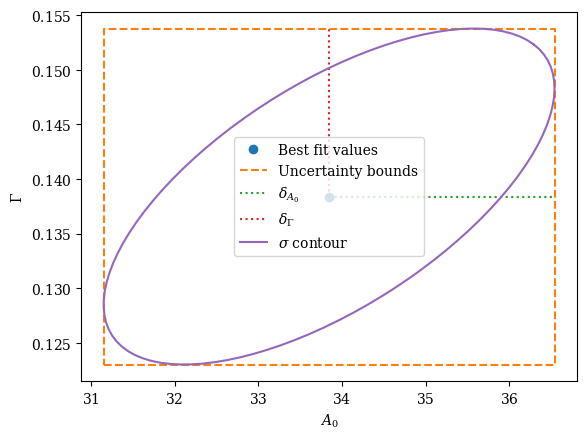

In [29]:
plot(A0,Gamma,'o',label='Best fit values')
plot(rect[:,0],rect[:,1],'--',label='Uncertainty bounds')
plot(aline[:,0],aline[:,1],':',label=r'$\delta_{A_0}$')
plot(bline[:,0],bline[:,1],':',label=r'$\delta_{\Gamma}$')

cont = nsigma_contour2(A0,Gamma,eA0,eGamma,cA0Gamma/eA0/eGamma)
plot(cont[:,0],cont[:,1],'-',label=fr'$\sigma$ contour')

xlabel(r'$A_0$')
ylabel(r'$\Gamma$')
legend();

Vi kan generaliserer dette til at beregne _alle_ kontourer for _alle_ parameter-par for et given $n$ og give os tilbage $n\sigma$ kontourerne i en trekant liste 

We can generalize this to calculate the _all_ contours for _all_ parameter pairs for a given $n$ and give us back the $n\sigma$ contours in a triangle list

In [30]:
def nsigma_contour(p,cov,n=1,nstep=100):
    from numpy import tril_indices_from, newaxis, sqrt, diagonal
    var = diagonal(cov)
    rho = cov/sqrt(var[:,newaxis].dot(var[newaxis,:]))
    ret = [list() for _ in range(len(cov)-1)]
    for i,j in zip(*tril_indices_from(cov,-1)):
        a,  b  = p[j], p[i]
        ea, eb = sqrt(var[j]), sqrt(var[i])
        rhoab  = rho[j,i] # cov[j,i]/ea/eb
        ret[i-1].append(nsigma_contour2(a,b,ea,eb,rhoab,n,nstep))
        
    return ret

Vi kan bruge denne funktion til at tegne _alle_ vores kontourer. Vi laver en funktion der nemt kan tegne et hjørne plot af alle korrelationer. 

We can use this function to draw _all_ our outlines. We make a function that enable us to easily draw all correlations. 

In [31]:
def plot_nsigma_contour(p,cov,ns=1,nstep=100,fig_kw={},**kwargs):
    from matplotlib.pyplot import clabel, subplot2grid, plot, gca, gcf
    from matplotlib.contour import ContourSet
    from numpy import triu_indices, atleast_1d, min, max, ptp
    from numpy.ma import asarray 
    
    n      = len(p)-1
    ns     = atleast_1d(ns)
    pars   = kwargs.pop('parameters',kwargs.pop('pnames',None))
    
    gs_kw = kwargs.pop('gridspec_kw',{})
    if not 'wspace' in gs_kw: gs_kw['wspace'] = 0
    if not 'hspace' in gs_kw: gs_kw['hspace'] = 0
    
    sub_kw = kwargs.pop('fig_kw',kwargs.pop('subplots',{}))
    if not 'sharex' in sub_kw: sub_kw['sharex'] = 'col'
    if not 'sharey' in sub_kw: sub_kw['sharey'] = 'row'
    
    clbl = kwargs.pop('clabel',True)
    cleg = kwargs.pop('legend',False)
    if not isinstance(clbl,str):
        clbl = r'\sigma'
    if cleg and not isinstance(cleg,str):
        cleg = 'n'
        
    title = kwargs.pop('title','')
    vals  = kwargs.pop('values',True)
    
    if 'colors' in kwargs:
        if kwargs['colors'] == 'auto':
            kwargs['colors'] = ['C'+str(i) for i in range(len(ns))]
    elif 'cmap' not in kwargs:
        kwargs['cmap'] = 'tab10'
    
    if pars is None:
        pars = ['']*(n+1)
        
    def _one(a,cc,ns,clbl,cleg,**kwargs):
        cs = ContourSet(a,ns,cc,None,**kwargs)

        yrng = (min([ci[0][:,1].min() for ci in cc]),
                max([ci[0][:,1].max() for ci in cc]))
        xrng = (min([ci[0][:,0].min() for ci in cc]),
                max([ci[0][:,0].max() for ci in cc]))
        xdel = ptp(xrng)
        ydel = ptp(yrng)
        a.set_ylim(yrng[0]-.05*ydel,yrng[1]+.05*ydel)
        a.set_xlim(xrng[0]-.05*xdel,xrng[1]+.05*xdel)
            
        if clbl:
            clabel(cs,ns,fmt=lambda l: f'${l}{clbl}$')
        if cleg:
            return cs.legend_elements(cleg)
        
    cont   = nsigma_contour(p,cov,ns,nstep)
    if len(cont) == 1:
        if kwargs.pop('fig',False):
            print('Keyword "fig" makes little sense for 1 parameter')
        ax = kwargs.pop('ax',gca())
        ax.set_title(title)
        fig = ax.figure
        ax  = [[ax]]
    else:
        if kwargs.pop('ax',False):
            print('Keyword "ax" makes little sense for more than 1 parameter, ignored')
        fig = kwargs.pop('fig',gcf())
        ax  = fig.subplots(ncols=n,nrows=n,squeeze=False,
                           gridspec_kw=gs_kw,**sub_kw)
        fig.suptitle(title)
        for i,j in zip(*triu_indices(n,1)):
            ax[i,j].remove()
    
    
    def paren(t):
        return t if t == '' else f'({t})'
    
    def lbl(l):
        if isinstance(l,dict):
            return ' '.join([fr'${l.get("label"," ")}$',
                             fr'{paren(l.get("unit",""))}'])
        if isinstance(l,str) and len(l) > 0:
            return fr'${l}$'
        return ''
    
    cnta = None
    for i, (l, ar, ny) in enumerate(zip(cont, ax, pars[1:])):
        for j, (c, a, nx),  in enumerate(zip(l, ar, pars[:-1])):
            if not isinstance(c,list):
                c = [c]
            cc   = [[asarray(ci)] for ci in c]
            cnta = _one(a,cc,ns,clbl,cleg,**kwargs)    
            if vals: 
                a.plot(p[j],p[i+1],'ok')
                     
            if j == 0:
                a.set_ylabel(lbl(ny))
            if i == n - 1:
                a.set_xlabel(lbl(nx))
                
    if cnta is not None:
        o = (n+1)//2
        s = n//2
        if s > 0:
            # lax = subplot2grid((n,n),(0,o),rowspan=s,colspan=s)
            x1,y1,w1,h1 = ax[s-1,o].get_position().bounds
            x2,y2,w2,h2 = ax[0  ,-1].get_position().bounds
            xx = x1+0.015
            yy = y1+0.015
            ww = x2+w2-xx
            hh = y2+h2-yy
            lax = fig.add_axes((xx,yy,ww,hh))
            lax.axis('off')
        else:
            lax = ax[0][0]
        lax.legend(cnta[0],cnta[1])


Vi tegner nu alle korrelationer for $n\sigma$ med $n=1,2$. 

We now draw all correlations for $n\sigma$ with $n=1,2$.

Tilpasnings konturer for alle parametre for $n=1,2$ gange $\sigma$.

Fitting contours for all parameters for $n=1,2$ times $\sigma$.

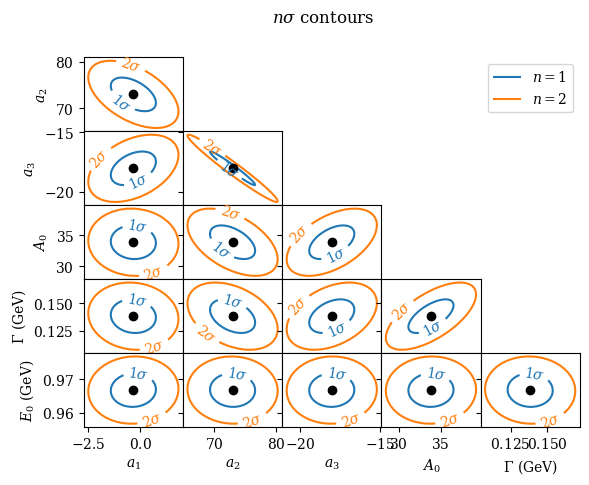

In [32]:
plot_nsigma_contour(p,pcov,[1,2],colors='auto',
                    title=r'$n\sigma$ contours',
                    legend=True,
                    clabel=True,
                    parameters=par)

Af figuren ovenover ser vi tydligt hvilke parametre der er (anti-)korreleret og hvilke der ikke er - jo mere skæv ellipsen er for et givet par af parametre, jo mere (anti-)korreleret er de to.  For eksempel er $a_2,a_3$ stærkt anti-korreleret, mens $A_0$ og $\Gamma$ er noget korreleret.  Modsat ser vi at $E_0$ ikke er specielt korreleret med nogle af de andre parametre.  

From the figure above, we clearly see which parameters are (anti-)correlated and which are not - the more skewed the ellipse is for a given pair of parameters, the more (anti-)correlated the two are. For example, $a_2,a_3$ is highly anti-correlated, while $A_0$ and $\Gamma$ are somewhat correlated. Conversely, we see that $E_0$ is not particularly correlated with some of the other parameters.

Lad os nu, her til sidst, vil vi lave en lidt kompliceret figur med 

- `plot_fit`
- `plot_residual` 
- `plot_nsigma_contour` 

Now, finally, let's make a slightly complicated figure

- `plot_fit`
- `plot_residual`
- `plot _nsigma_contour`

Kurvetilpasning af Briet-Wigner og polynimisk baggrund til data.  Data og kurve er vist øverst til venstre, residular nedest til venstre.  Kontourer er vist til højre.

Curve fit of Briet-Wigner and polynomial background to data. Data and graphs are shown at the top left, residuals on the bottom left. Contours are shown on the right.

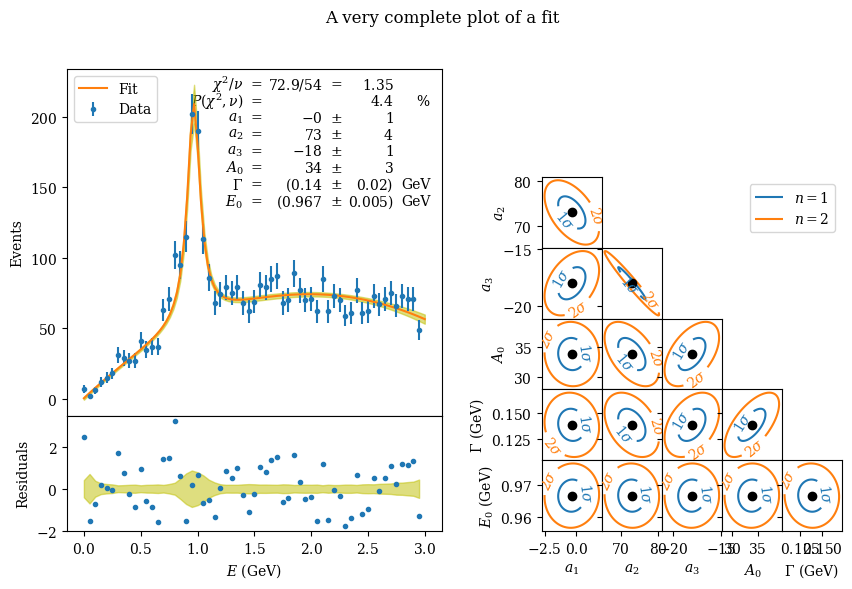

In [33]:
from matplotlib.pyplot import figure

fig = figure(figsize=(10,6))

ax = fig.subplots(nrows=2,sharex=True,
                  squeeze=False,
                  subplot_kw=dict(label='Unique'),
                  gridspec_kw=dict(wspace=0,
                                   hspace=0,
                                   right=.5, # adjust
                                   height_ratios=(3,1)))
plot_fit(x,y,ey,peakBackground,p,pcov,ax=ax[0,0],
         parameters=par,
         xeval=linspace(0,3,100),
         data={"label":"Data","fmt":"."},
         fit={"label":"Fit"},
         legend={"loc":"upper left"})
ax[0,0].set_ylabel("Events")

plot_residual(x,y,peakBackground,p,pcov,ey,ax=ax[1,0],
              residuals={'marker':'.','ls':'none'})
ax[1,0].set_xlabel("$E$ (GeV)")
ax[1,0].set_ylabel('Residuals')

plot_nsigma_contour(p,pcov,[1,2],colors='auto',
                    gridspec_kw=dict(left=.6,top=.7), # adjust
                    legend=True,
                    clabel=True,
                    parameters=par)

fig.suptitle('A very complete plot of a fit');

For at simplificerer denne slags plot en smule laver vi en funktion der kan hjælpe os. 

To simplify this kind of plot a bit, we make a function that can help us.

In [34]:
def plot_fit_detailed(x,y,ey,f,p,cov,ax=None,rax=None,
                      right=.5,
                      contours=[1,2],
                      contour_legend=True,
                      contour_labels=True,
                      contour_top=.7,
                      contour_left=.6,
                      **kwargs):
    from matplotlib.pyplot import gca 
    ax = ax if not ax is None else gca()
    
    res_kw  = kwargs.pop('residuals',{})
    par_kw  = kwargs.get('parameters',{})
    
    l,b,w,h = ax.get_position().bounds
    ax.set_position((l,b,right-l,h))
    plot_fit(x,y,ey,f,p,cov,ax=ax,**kwargs)
    
    if rax is not None:
        l,b,w,h = rax.get_position().bounds
        rax.set_position((l,b,right-l,h))
        plot_residual(x,y,f,p,cov,ax=rax,
                      residuals=res_kw)
        
    if right < 1:
        plot_nsigma_contour(p,cov,
                            contours,
                            colors='auto',
                            gridspec_kw=dict(left=contour_left,
                                             top=contour_top),
                            legend=contour_legend,
                            clabel=contour_labels,
                            parameters=par_kw) 
    

Vi bruger denne funktion til at gentage plottet fra ovenover. 

We use this function to repeat the plot from above.

Kurvetilpasning af Briet-Wigner og polynimisk baggrund til data.  Data og kurve er vist øverst til venstre, residular nedest til venstre.  Kontourer er vist til højre.

Curve fit of Briet-Wigner and polynomial background to data. Data and graphs are shown at the top left, residuals on the bottom left. Contours are shown on the right.

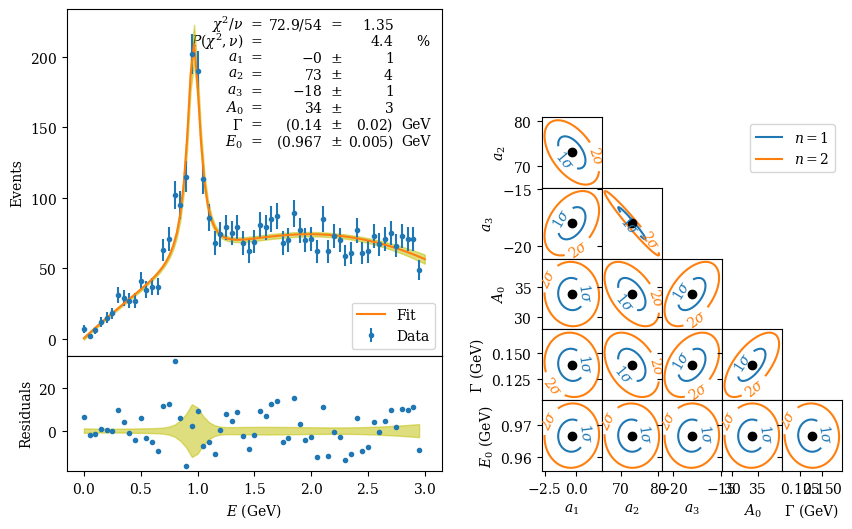

In [35]:
fig, ax = subplots(nrows=2,sharex=True,figsize=(10,6),
                   gridspec_kw={'hspace':0,'wspace':0,
                                'height_ratios':(3,1)})
plot_fit_detailed(x,y,ey,peakBackground,p,pcov,ax=ax[0],rax=ax[1],
                  parameters=par,
                  right=.5,
                  contour_left=.6,
                  xeval=linspace(0,3,100),
                  data={"label":"Data","fmt":"."},
                  fit={"label":"Fit"},
                  legend={"loc":"lower right"},
                  residuals={'marker':'.','ls':'none'})
ax[0].set_ylabel('Events')
ax[1].set_ylabel('Residuals')
ax[1].set_xlabel('$E$ (GeV)');

Et sidste værktøj vi vil lave i denne omgang er en funktion der skriver resultatet af en kurvetilpasning ud som en tabel.   Vi kan give parametre navne, $\chi^2,\nu$, og vise med Jupyter notebooks `display` funktion. 

A final tool we will make this time around is a function that writes the result of a curve fit as a table. We can give parameters names, $\chi^2,\nu$, and show with Jupyter notebooks `display` function.

In [36]:
def format_fit_result(p,ep,
                      parameters=None,
                      chi2nu=None,
                      pvalue=None,
                      **kwargs):
    from numpy import floor, log10, abs, ndim, sqrt, diagonal, atleast_1d
    
    rows    = None
    columns = None 
    cells   = []
    cov     = None
    np      = len(p)
    dl      = '$' if kwargs.get('mode','') != 'latex' else ''
    
    if ep is None:
        ep = [None]*len(p)
    elif ndim(ep) == 2:
        cov = ep
        ep = sqrt(diagonal(ep))
    else:
        ep = atleast_1d(ep)
    
    # Calculate chi^2 and nu, and add to lines
    if chi2nu is not None:
        rows = [fr'{dl}\chi^2{dl}',fr'{dl}\nu{dl}']
        chisq, nu = chi2nu
        cells += [[chisq] + ([] if not cov is not None else [None]*np)] 
        cells += [[nu]    + ([] if not cov is not None else [None]*np)]

        if pvalue is not None and pvalue:
            from scipy.stats import chi2
            prob  =  chi2.sf(*chi2nu)
            rows  += [fr'{dl}P(\chi^2,\nu){dl}']
            cells += [[prob] + ([] if not cov is not None else [None]*np)]


    # Add parameter values to lines 
    if parameters is None and rows is not None:
        parameters = {'label':'auto'}
    if parameters is not None:
        if rows is None:
            rows = []
        if cov is not None:
            columns = ['Value' if dl == '$' else r'\mathrm{Value}']
            
        if isinstance(parameters,dict):
            pars = [parameters.copy() for _ in range(len(p))]
        elif len(parameters) < len(p):
            pars = parameters.copy() + \
               [{'label':'auto'} for _ in range(len(p)-len(parameters))]
        else:
            pars = parameters.copy()
        
        for pi in range(len(pars)):
            if isinstance(pars[pi],str):
                pars[pi] = dict(label=pars[pi])
            if not isinstance(pars[pi],dict):
                print('Warning, parameter options not dict')
            if 'label' not in pars[pi] or pars[pi]['label'] == 'auto':
                pars[pi]['label'] = f'p_{{{pi+1}}}'
                
            rows += [f'{dl}{pars[pi]["label"]}{dl}']
            if columns is not None:
                columns += [f'{dl}{pars[pi]["label"]}{dl}']
        
    for pi, (pv, pe) in enumerate(zip(p, ep)):
        row = [[pv,pe]]
        if cov is not None:
            row += [None]*pi
            for qi, cv in enumerate(cov[pi,pi:]):
                row += [cv/(pe*ep[qi+pi])]
                
        cells += [row]

    ret = format_data_table(cells,columns=columns,rows=rows,**kwargs)
    return ret 

Her bruger vi denne funktion på resultatet ovenover.  Bemærk, hvis vi giver den fulde kovariansmatrix, så får vi også korrelationskoefficenterne i tabellen.  På den måde kan vi nemt identificerer hvilke parametre der afhænger af hindanden. 

Here we use this function on the result above. Note, if we give the full covariance matrix, then we also get the correlation coefficients in the table. That way we can easily identify which parameters depend on each other.

In [37]:
from IPython.display import Markdown, Latex, HTML
display(Markdown(format_fit_result(p,pcov,parameters=par,chi2nu=(72.9,54),pvalue=True,mode='markdown')))

| |$Value$|$a_1$|$a_2$|$a_3$|$A_0$|$\Gamma$|$E_0$ |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:
| $$\chi^2$$|$70$|||||| |
| $$\nu$$|$50$|||||| |
| $$P(\chi^2,\nu)$$|$0.04$|||||| |
| $$a_1$$|$-0\pm1$|$1$|$-0.5$|$0.4$|$-0.05$|$-0.08$|$0.04$ |
| $$a_2$$|$73\pm4$||$1$|$-1$|$-0.5$|$-0.4$|$-0.02$ |
| $$a_3$$|$-18\pm1$|||$1$|$0.5$|$0.4$|$0.02$ |
| $$A_0$$|$34\pm3$||||$1$|$0.6$|$0.02$ |
| $$\Gamma$$|$0.14\pm0.02$|||||$1$|$-0.03$ |
| $$E_0$$|$0.967\pm0.005$||||||$1$ |


## Ikke-lineære modeller som lineære modeller 

En funktion som 

## Nonlinear models as linear models

A function like

$$ f(x;a,b) = a x^b\quad,$$

er ikke umiddelbar lineær i $b$, men vi kan manipulerer lidt.  Vi kan f.eks. tage logaritmen, så 

is not obviously linear in $b$, but we can manipulate it a little. For example, we can take the logarithm on both sides to get

$$ \log f(x;a,b) = \log(a) + b\log(x)\quad,$$ 

som _er_ lineær i $\log(a)$ og $b$.  Vi kan altså transformerer vores problem så at 

which _is_ linear in $\log(a)$ and $b$. So we can transform our problem so that

\begin{align*}
  x & \rightarrow x'=\log(x)\\
  y & \rightarrow y'=\log(y)\\
  a & \rightarrow a'=\log(a)\\
  f(x;a,b) & \rightarrow g(x';a',b)=a'+b'x'\quad,
\end{align*}

som altså er et lineært problem vi kan løse eksakt.  Det er vigtigt at holde sig denne mulighed for øje når man laver kurvetilpasning, da det kan simplificerer problemet temmelig meget. 

which is thus a linear problem we can solve exactly. It is important to keep this in mind when making curve fitting, as this can simplify the problem quite a lot.

## Opsummering

Ovenover har vi gennemgået væsentlige træk i _kurvetilpasning_.  Vi har defineret antallet af frihedsgrader $\nu$, 
og bestemt $\chi^2$ målet - på en systematisk måde - for hvor god en given kurvetilpasning er.  Vi har at set for _lineære_ modeller at der findes en _eksakt_ løsning til minimering af $\chi^2$, mens at vi for _ikke-lineære_ modeller må ty til numeriske metoder.  Vi har udvilket funktionen `lin_fit` til at løse det lineære problem, ligesom vi har lavet en generaliseret funktion til at visualisere en kurvetilpasning i form af `plot_fit`. 

Desuden har vi introduceret konjukturer for kurve tilpasning og defineret funktionerne `nsigma_contour` og `plot_nsigma_contour`.  Vi har også kigget på _residualer_ og udviklet funtionerne `residuals` og `plot_residuals`. 

## Summary

Above, we have gone through some significant features in _curve fitting_. We have defined the number of degrees of freedom $\nu$, and determined the $\chi^2$ statistic - in a systematic way - for how good a given curve fit is. We have seen for _linear_ models that there is an exact solution for minimizing $\chi^2$, while for _non-linear_ models we have to resort to numerical methods. We have developed the function `lin_fit` to solve the linear problem, just as we have made a generalized function to visualize a curve fit in the form of `plot_fit`.

In addition, we have introduced curve fitting conjectures and defined the functions `nsigma_contour` and` plot_nsigma_contour`. We also looked at _residuals_ and developed the functions `residuals` and `plot_residual`.

In [38]:
chi2nu.__doc__=\
"""Calculate the chi-square over the sample (x,y)
   for the model f with parameters p. 

Note, points where delta<=0 are explicitly ignored

Parameters
----------
x : array-like 
    Independent variable, N long 
y : array-like 
    Dependent variable, N long 
delta : array-like (optional)
    Uncertainty on y or None
f : callable
    Our model function with signature f(x,a...)
p : array-like 
    Model parameters 
deltax : array-like 
    Uncertainty in X.  If this is specified then the 
    effective variance is calculated and used instead of the 
    y variance (given in delta)
df : callable 
    The derivative of f with respect to x (only relevant if deltax is not
    None)
df_step : float 
    The step size for numerical differentation of f with respect to x
-    (only relevant if deltax is not None)


Returns
-------
chi2 : float 
    Calculated schi-square 
nu : int
    Number degrees of freedom
    
See also
--------
lsq_fit 
"""

In [39]:
lin_fit.__doc__=\
"""Fit a linear model f to data

Parameters
----------
x : array-like, float 
    Independent variable of length N
y : array-like, float 
    Dependent variable of length N 
delta : array-like, float (optional)
    Uncertainties on y 
f : array-like, callable 
    Array of length Nf, of callables that 
    evaluate each term in the linear model

Returns
-------
p : array-like 
    Estiamte of the Nf parameters 
pcov : array-like 
    Covarience matrix of p's
    
See also
--------
lsq_fit, fit, mle_fit, plot_fit
"""

In [40]:
plot_fit_table.__doc__ =\
"""Plot a fit table in the current (or passed) axes

Parameters
----------
p : array-like 
    Best-fit parameter values 
ep : array-like 
    Best-fit parameter uncertainties 
nsig : int (optional, default: 1)
    Number of significant digits to show each uncertainty with. 
    Values are rounded to the same precision 
chi2nu : (float,int) (optional, default None)
    If a tuple, then it must contain the value of 
    the chi^2 and number of degrees of freedom.
pvalue : bool (optional, default: True)  
    If true, add chi^2 probability to table 
parameters : sequence (optional, default: None)
    List of names of parameters, or dictionary of options.  
    If an entry is a dict, then it can have the keys 
    - label: name of the parameter. If auto then a default name is chosen
    - scale: Power of 10, or auto to scale by orders of magnitude 
    - unit:  Unit of the parameter. 
    - nsig:  Number of significant digits to round to 
    Generic names are used if none is given 
ax : Axes (optional, default: None)
    Axes to draw table in.  If none, draw in current axes. 
tit_kw : dict (optional)
    Dictionary of title font options 
    
See also
-------- 
plot_fit, plot_fit_func, fit, lsq_fit
"""

In [41]:
plot_fit_func.__doc__ = \
"""Plot fit function with found parameters and (optional uncertainty band)

Parameters
----------
x : array-like 
    Where to evaluate the function 
f : callable 
    Function to call 
p : array-like 
    Found best-fit parameter values 
cov : array-like 
    Parameter errors or covariance matrix 
band : bool or dict 
    IF false, do not draw uncertainty band, otherwise 
    keyword arguments passed to band drawing procedure 
    
    Some special keywords 
    
    - step_factor: Stepping factor for numerial differentiation
    - factor: Scale factor on uncertainties (e.g., 2 means draw 2-sigma
      uncertainty band)
ax : Axes 
    Axes to draw in. If none, current axes 
kwargs : dict
    passed on to drawing procedure 

Returns
-------
fit : Artist 
    Artist of fit function drawn 
    
    
See also
-------- 
plot_fit, plot_fit_table, fit, lsq_fit
"""

In [42]:
plot_fit.__doc__=\
"""Plot data and a fitted funtion

Parameters
----------
x : array-like 
    Independent variable of length N
y : array-like 
    Dependent variable of length N
delta : array-like 
    Uncertainty in y of length N
f : callable 
    Fitted function with signature f(x,a,...) 
p : array-like 
    Best-fit parameter values of length Nf
ep : array-like 
    Best-fit parameter uncertainties of length Nf, 
    or the covariance of the fitted parameters of size (Nf,Nf). 
    
    Note, if a vector (array of length Nf) is given, it must be the
    uncertainties (not the square uncertainties). 
xdelta : array-like (optional)
    Uncertainty on x of length N.  If specified, these uncertainties 
    will be part of the chi^2 calculation and shown on the plot. 
    If these uncertainties are not to be part of the chi^2 calculation,
    pass this array as the value of the keyword "xerr" in `data_kw`.  
    Note, unless `xeval` is pass, this will change the range over which 
    the function is evaluated to include the left and right most 
    uncertainties of the data. 
parameters : sequence (optional, default: None)
    List of names of parameters, or dictionary of options.  
    If an entry is a dict, then it can have the keys 
    - label: name of the parameter. If auto then a default name is chosen
    - scale: (default: None) Power of 10, or auto to scale by orders of magnitude 
    - unit:  (default: '')   Unit of the parameter. 
    - nsig:  (default: 1)    Number of significant digits to round to 
    Generic names are used if none is given.  Note if scale or unit is set for 
    a parameter, then the parameter value and uncertainty will be bracketed. 
fit : bool or dict 
    If false, do not plot fit. Otherwise if a dictionary pass 
    these as keyword arguments to the fit plot call 
band : bool or dict 
    If false, do not plot uncertainty band. Otherwise pass 
    value as keyword arguments to the drawing routine. 
    - The keyword 'factor' applies a multiplicative factor 
      to the uncertainty band (e.g., factor=2 will draw 2-sigma 
      contour)
    - The keyword 'step_factor' value is applied for differentiation 
data : bool or dict 
    If false do not draw data.  Otherwise, pass as keyword 
    arguments to the drawing procedure.  The keyword 'plot' can be 
    set to a plotting function (e.g., matplotlib.pyplot.errorbar, which is also 
    the default) with the signature 
    
        plot(x,y,yerr,*args,**kwargs) 
    
    The plotting function must draw in the current axes. 
    
    If the keyword 'xerr' is present in this dictionary, then 
    the function plot range is adjusted to encompass the end-points 
    
legend : bool or dict 
    If false, do not draw legend. Otherwise, pass as keyword 
    arguments to the drawing procedure
table : bool or dict     
     If false, do not draw parameter table. Otherwise, pass as keyword 
    arguments to the drawing procedure
**kwargs: dict (optional)
    Other keyword arguments:

    xeval : array-like (optional)
        Specifies the independent variable (`x`) locations to evaluate 
        the function at.  If not specified the passed `x` locations 
        are used.  Here, one can pass for example the result of 
        `np.linspace(min,max,steps)` to plot the function with better 
        resolution than the passed x-coordinates would allow. 
    nsig : int (optional)
        Number of significant digits to show parameters with
    pvalue : bool (optional, default=True)
        If true, show the chi^2 probability 
    chi2 : bool or (float,int) (optional, default=True) 
        If true, show chi^2.  If pair of float and int, assume them to
        be the chi-sqaure and number of degrees of freedom, respectively. 
    axes : matplotlib.pyplot.Axes (optional)
        Axes object to plot in. If none given, then in current axes
    df : callable 
        Derivative of f wrt. x.  Only relevant if xdelta is given. 

Returns
-------
dat : Artist 
    Data artist 
fit : Artist 
    Fit artist 
tab : Artist 
    Table artist 
leg : Artist 
    Legend artist 
    
See also
--------
plot_fit_table, plot_fit_func, fit, lsq_fit, plot_nsigma_contour, chi2nu, plot_residuals
"""

fit_plot = plot_fit

In [43]:
residuals.__doc__ =\
    """Calculate the residuals with respect to some function
    
    This will calculate the residuals of the data sample 
    
        {x_,y_,delta_i | i=1,...N}
        
    with respect to the function f(x,p), where p are the parameters of the function 
    
    Note, points with delta_i=0 are explicitly ignored 
    
    Parameters
    ----------
    x : array-like 
        Independent variable 
    y : array-like 
        Dependent variable 
    ey : array-like 
        Uncertainty on y 
    f : callable 
        function 
    p : array-like 
        function parameters 
        
    Returns
    --------
    x : array-like 
        Places where the residuls have been evaluated 
    r : array-like 
        Residuals
        
    See also
    --------
    plot_residuals, lsq_fit, fit
    """

In [44]:
plot_residual.__doc__ = \
"""Plot the residuls and uncertainty on function 


Parameters
----------
x : array-like 
    Independent variable 
y : array-like 
    Dependent variable 
ey : array-like 
    Uncertainty on y 
f : callable 
    function 
p : array-like 
    function parameters
cov : array-like 
    Uncertainty or covariance in parameters 
**kwargs : dict 

    function : str or dict 
        Label or dictionary of keys for function drawing 
    residuals : str or dict 
        Label or dictionary of keys for residual drawing 

Returns
--------
artists : tuple
    Tuple of drawn artist or none 
    
See also
--------
residuals, lsq_fit
"""

residual_plot = plot_residual

In [45]:
nsigma_contour2.__doc__=\
"""Calculate the two parameter n-sigma contour 

Parameters
----------
a : float 
    First parameter value 
b : float 
    Second parameter value 
ea : float 
    Uncertainty on the first parameter value 
eb : float 
    Uncertainty on the second parameter value 
rho : float 
    Correlation coefficient between a and b 
n : float 
    n times sigma contour to calculate 
nstep : int 
    Number of steps to take when evaluating ellipsis

Returns
-------
cont : 2-tuple of arrays 
    a and b coordinates of the contour 
    
See also
--------
nsigma_contour, plot_nsigma_contour, fit, lsq_fit
"""

In [46]:
nsigma_contour.__doc__=\
"""Calculate all n-sigma contours 

Parameters
----------
p : array like 
    Parameter valus 
cov : array-like 
    Covariance matrix of parameters 
n : float 
    Number of sigma contour to calculate 
nstep : int 
    Number of steps when calculating contour 
    
Returns
-------
cont : list 
    Triangular list of confidence contours for n-sigma 
    
See also
--------
plot_nsigma_contour, nsigma_contour2, fit, lsq_fit
"""

In [47]:
plot_nsigma_contour.__doc__=\
"""Plot nsigma contour lines 

Parameters
----------
p : array-like 
    Parameter valus
cov : array-like 
    Covariance matrix of parameters 
ns : scalar, list 
    Factors of sigma to show 
nstep : int 
    Number of steps in parameterisation of ellipsis 
fig_kw : dict 
    Keywards to pass to subplots 
parameters : list of str or dict 
    Parameter names or parameters (see also plot_fit)
kwargs : dict 
    
    fig : matplotlib.figure.Figure 
        Figure to plot in.  Only for more than 1 parameter 
    ax : matplotlib.axes.Axes 
        Axes to plot in.  Only for exactly 1 parametre 
    title : str 
        Title of plot_nsigma_contour
    values : bool 
        Whether to plot values as well 
    clabel : bool, str 
        Whether to label contours directly in plot 
    legend : bool, str 
        Wheter to produce a legend 
    
    Other keywords are passed on to ContourSet 
    
See also
--------
lsq_fit, fit, nsigma_contour, plot_fit

"""

In [48]:
plot_fit_detailed.__doc__ = \
"""
Plot data, fit, residuals of fit, and contours of fit 
parameters.  That is, plot a fit and data with more details.

Parameters
----------
x : array-like 
    Independent variable of length N
y : array-like 
    Dependent variable of length N
ey : array-like 
    Uncertainty in y of length N
f : callable 
    Fitted function with signature f(x,a,...) 
p : array-like 
    Best-fit parameter values of length Nf
ep : array-like 
    Best-fit parameter uncertainties of length Nf, 
    or the covariance of the fitted parameters of size (Nf,Nf). 
    
    Note, if a vector (array of length Nf) is given, it must be the
    uncertainties (not the square uncertainties). 
ax : matplotlib.axes.Axes 
    Axes to draw fit and data into 
rax : matplotlib.pyplot.Axes 
    Axes to draw residuals into.  If this is None, then the residuals 
    are not drawn.
right : float 
    Right bound of data, fit, and residuals plot.  This is 
    to leave room for the confidence countours of the best-fit
    parameters.  If this is larger than 1, then the contours 
    are not drawn. 
countours : int or list 
    Factors of sigma to draw 
countour_legend : bool 
    Whether to draw contour legend 
contour_labels : bool, str 
    Whether to label each contour 
contour_top : float 
    Top bound of contour plots 
contour_left : float 
    Left bound of contour plot (should be larger than right)
**kwargs:
    Keyword arguments passed to data, fit, and residuals plot.
    
    These are all the keyword arguments for plot_fit.  If the 
    `parameters` keyword is passed, then that is propagated to
    `plot_nsigma_contour`.  If the `residuals` keyword is 
    passed then that is given to `plot_residual`. 

See also
--------
plot_fit, plot_residual, plot_nsigma_contour
"""

In [49]:
format_fit_result.__doc__ = \
'''Formats best-fit parameter values and uncertainties in 
a table.   Optionally, the correlation coefficients, chi-square,
number degrees of freedom, and probability can be shown.  

The table can be displayed using IPython display
'''